In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pandas as pd # tabular data processing
import numpy as np
import xgboost as xgb

In [4]:
import xgboost as xgb

import missingno as msno
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt #!!!!!!
%matplotlib inline

In [5]:
import missingno as msno
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt #!!!!!!
%matplotlib inline

In [6]:
#kaggle competitions download -c rossmann-store-sales

In [7]:
#{"username":"anjumafia","key":"9af95942e1c1fc50b412c429720bbc0c"}

In [8]:
# import os
# os.environ['KAGGLE_USERNAME'] = "anjumafia"
# os.environ['KAGGLE_KEY'] = "9af95942e1c1fc50b412c429720bbc0c"

In [9]:
#!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

In [10]:
#!kaggle competitions download -c rossmann-store-sales

In [11]:

# Unzip the dataset
# !mkdir rossman_store
# !unzip rossmann-store-sales.zip -d rossman_store
# 
# # List the files in the dataset directory
# print(os.listdir('rossman_store'))

In [12]:
# Load the dataset using pandas
import pandas as pd

data = pd.read_csv('rossman_store/store.csv')
print(data.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [13]:
data = pd.read_csv('rossman_store/train.csv')
print(data.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


C:\Users\17807\AppData\Local\Temp\ipykernel_16544\1643882362.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('rossman_store/train.csv')


In [22]:
train = pd.read_csv('rossman_store/train.csv')
test = pd.read_csv('rossman_store/test.csv')
store = pd.read_csv('rossman_store/store.csv')

train = pd.read_csv('rossman_store/train.csv',
                   parse_dates = ['Date'], index_col = 'Date')

C:\Users\17807\AppData\Local\Temp\ipykernel_16544\1159265089.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('rossman_store/train.csv')
C:\Users\17807\AppData\Local\Temp\ipykernel_16544\1159265089.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('rossman_store/train.csv',


In [15]:
train.info(), test.info(), store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date     

(None, None, None)

C:\Users\17807\AppData\Local\Temp\ipykernel_28756\4107912465.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train.Open!=0].Sales)


The skewness of Sales is 1.5939220392699809


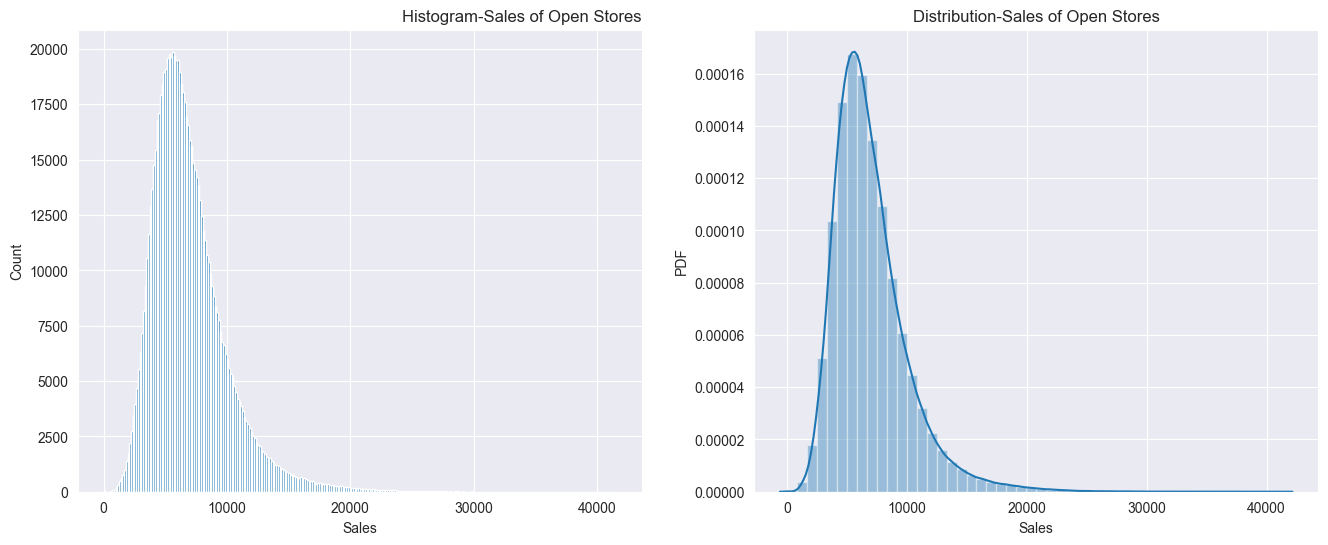

In [15]:
fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Count')
ax1.set_title(label='Histogram-Sales of Open Stores',loc='right')
#plt.xlim(-1,1)
#train.loc[train.Open==0].Sales.hist(align='left')
plt.hist(train.loc[train.Open==1].Sales,bins=300)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Sales')
ax2.set_ylabel('PDF')
ax2.set_title('Distribution-Sales of Open Stores')
sns.distplot(train.loc[train.Open!=0].Sales)

print('The skewness of Sales is {}'.format(train.loc[train.Open!=0].Sales.skew()))
#positively skewed#- 1.594, which is much greater than 0.75. A logarithmic transformation of the daily sales is required.

In [16]:
train = train.loc[train.Open != 0]

In [17]:
print(train.shape)

(844392, 9)


In [18]:
train = train.loc[train.Sales > 0].reset_index(drop=True)
print(train.shape)

(844338, 9)


In [19]:
train.loc[train.isnull().values==True]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [20]:
train.loc[train.isnull().values==True].shape

(0, 9)

In [21]:
test[test.isnull().values==True]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


<Axes: >

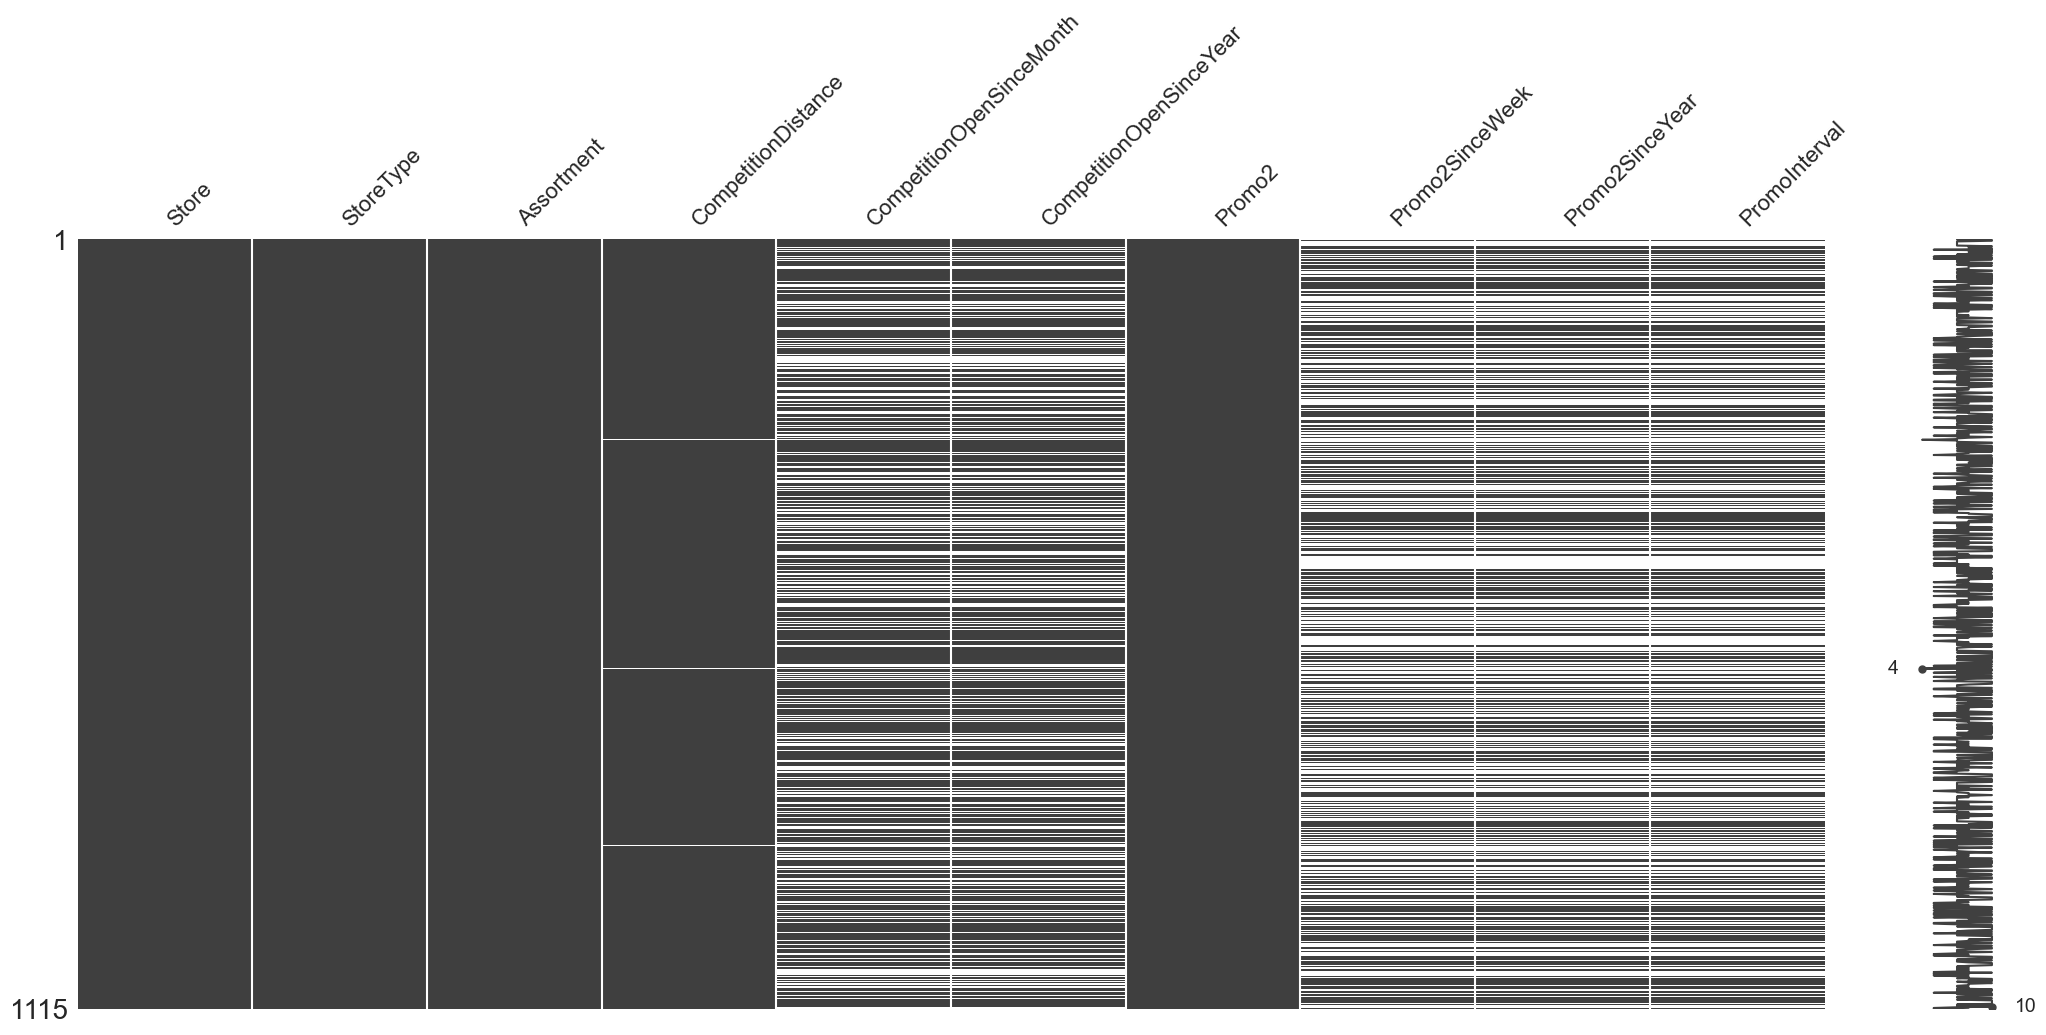

In [22]:
msno.matrix(store)
###msno module (specifically missingno) is a library used for visualizing and analyzing the missing data in datasets.
#shows a matrix of the missing and non-missing values in the dataset. 
#It highlights the non-missing values in white and the missing values in black. This plot helps to see if missing data is randomly distributed or if there are any patterns to its occurrence.

<Axes: >

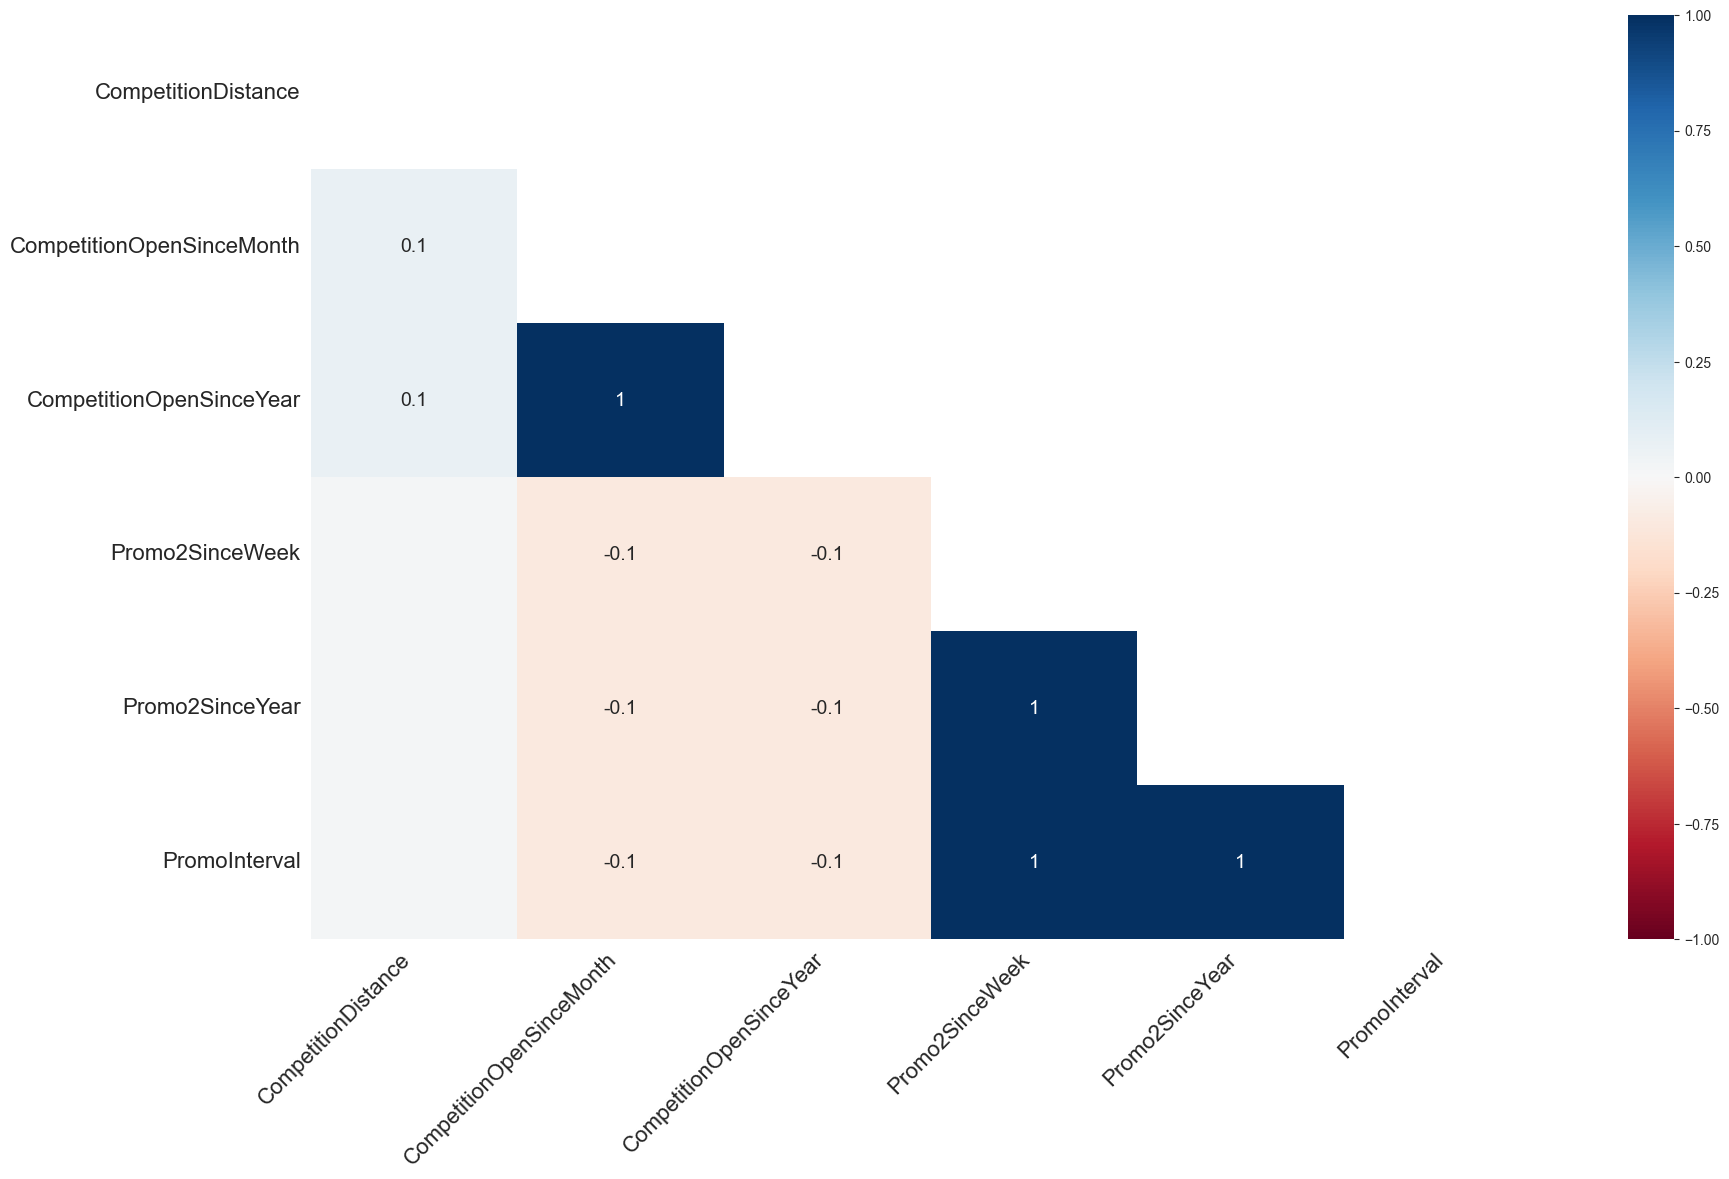

In [23]:
msno.heatmap(store)
#correlation between the presence of missing data in different columns.
#It shows how missingness in one variable relates to missingness in other variables, helping you detect patterns of missing data.

<Axes: >

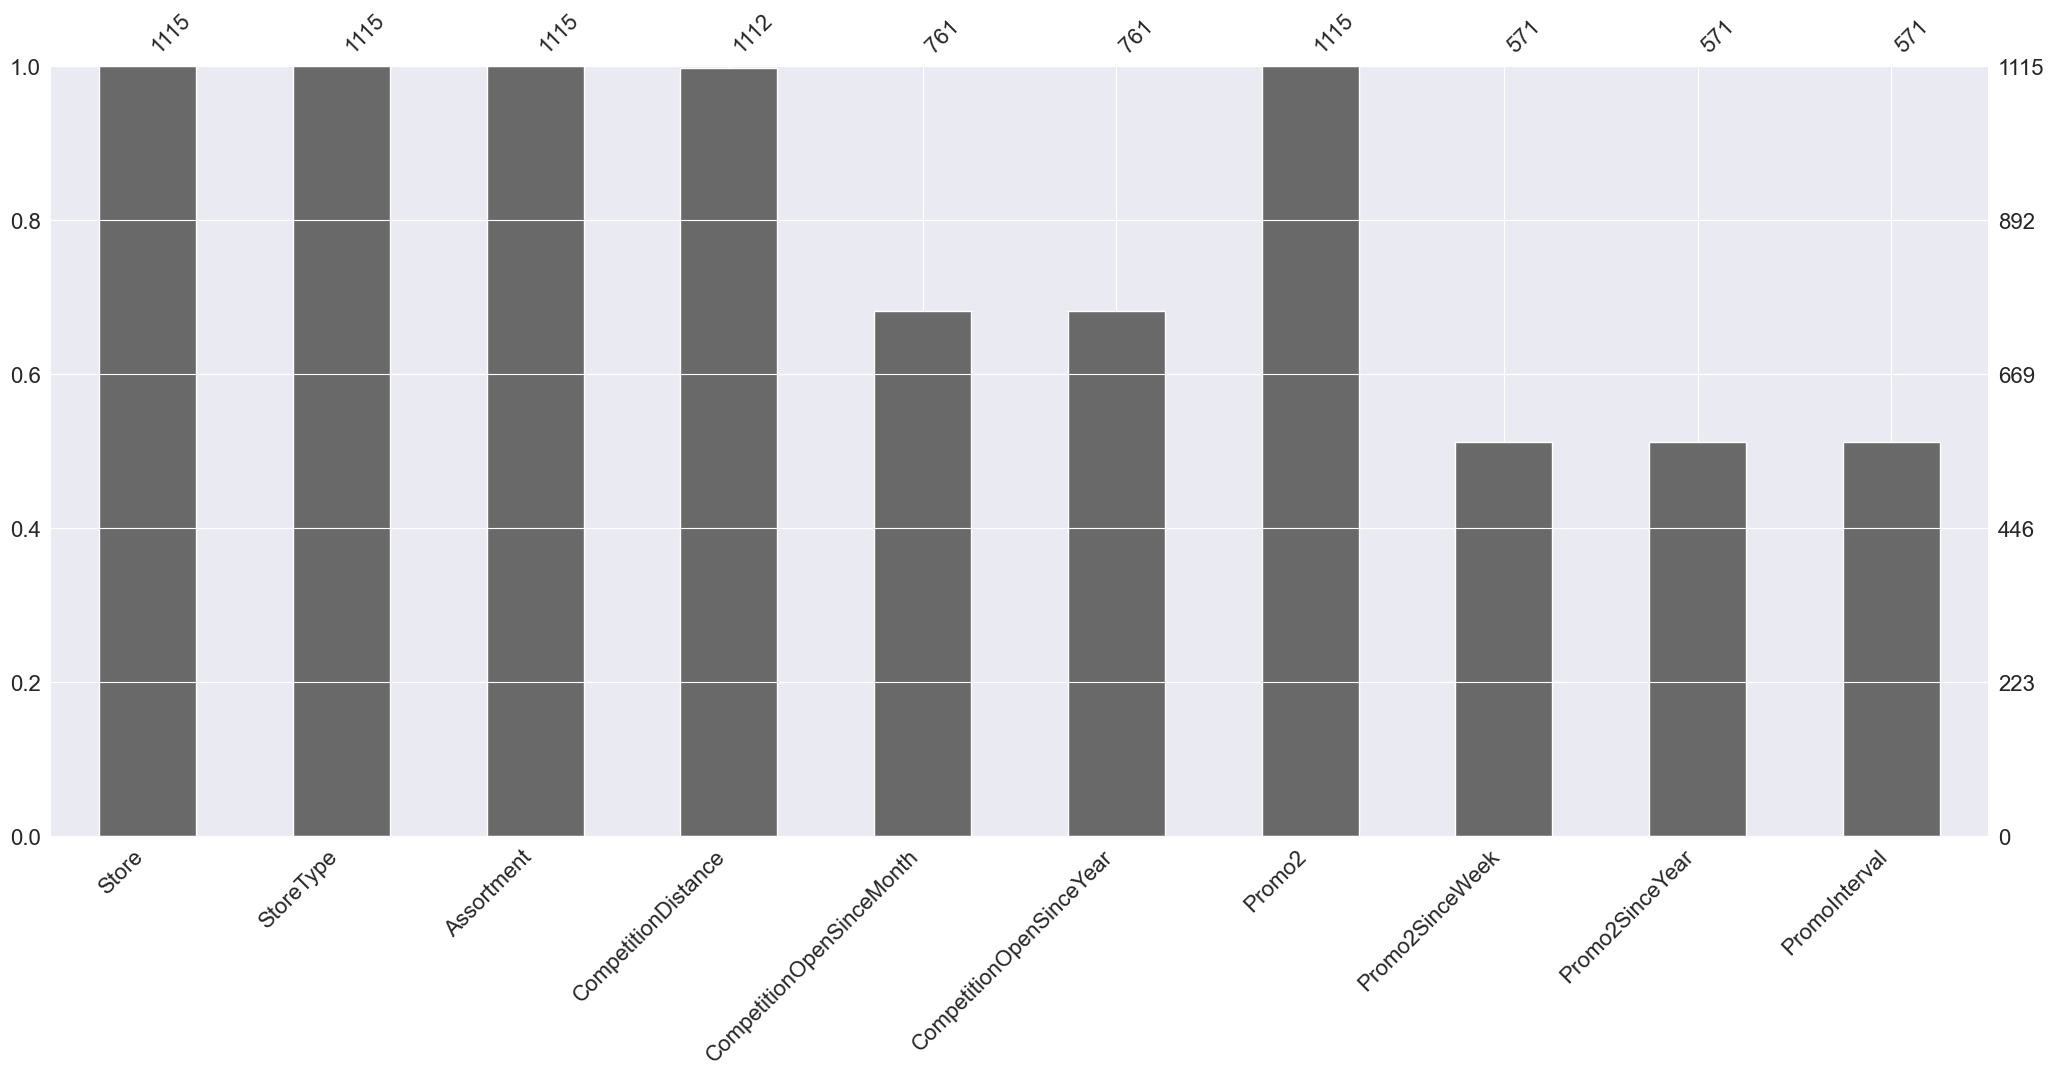

In [24]:
#bar plot gives a straightforward visualization of the number of non-null entries per column in the dataset. 
# It shows a simple comparison of how much missing data exists for each feature.
msno.bar(store)
#For example, in the figure below, we see almost no missing values in the frst three columns, as well as the 7th column. 

<Axes: >

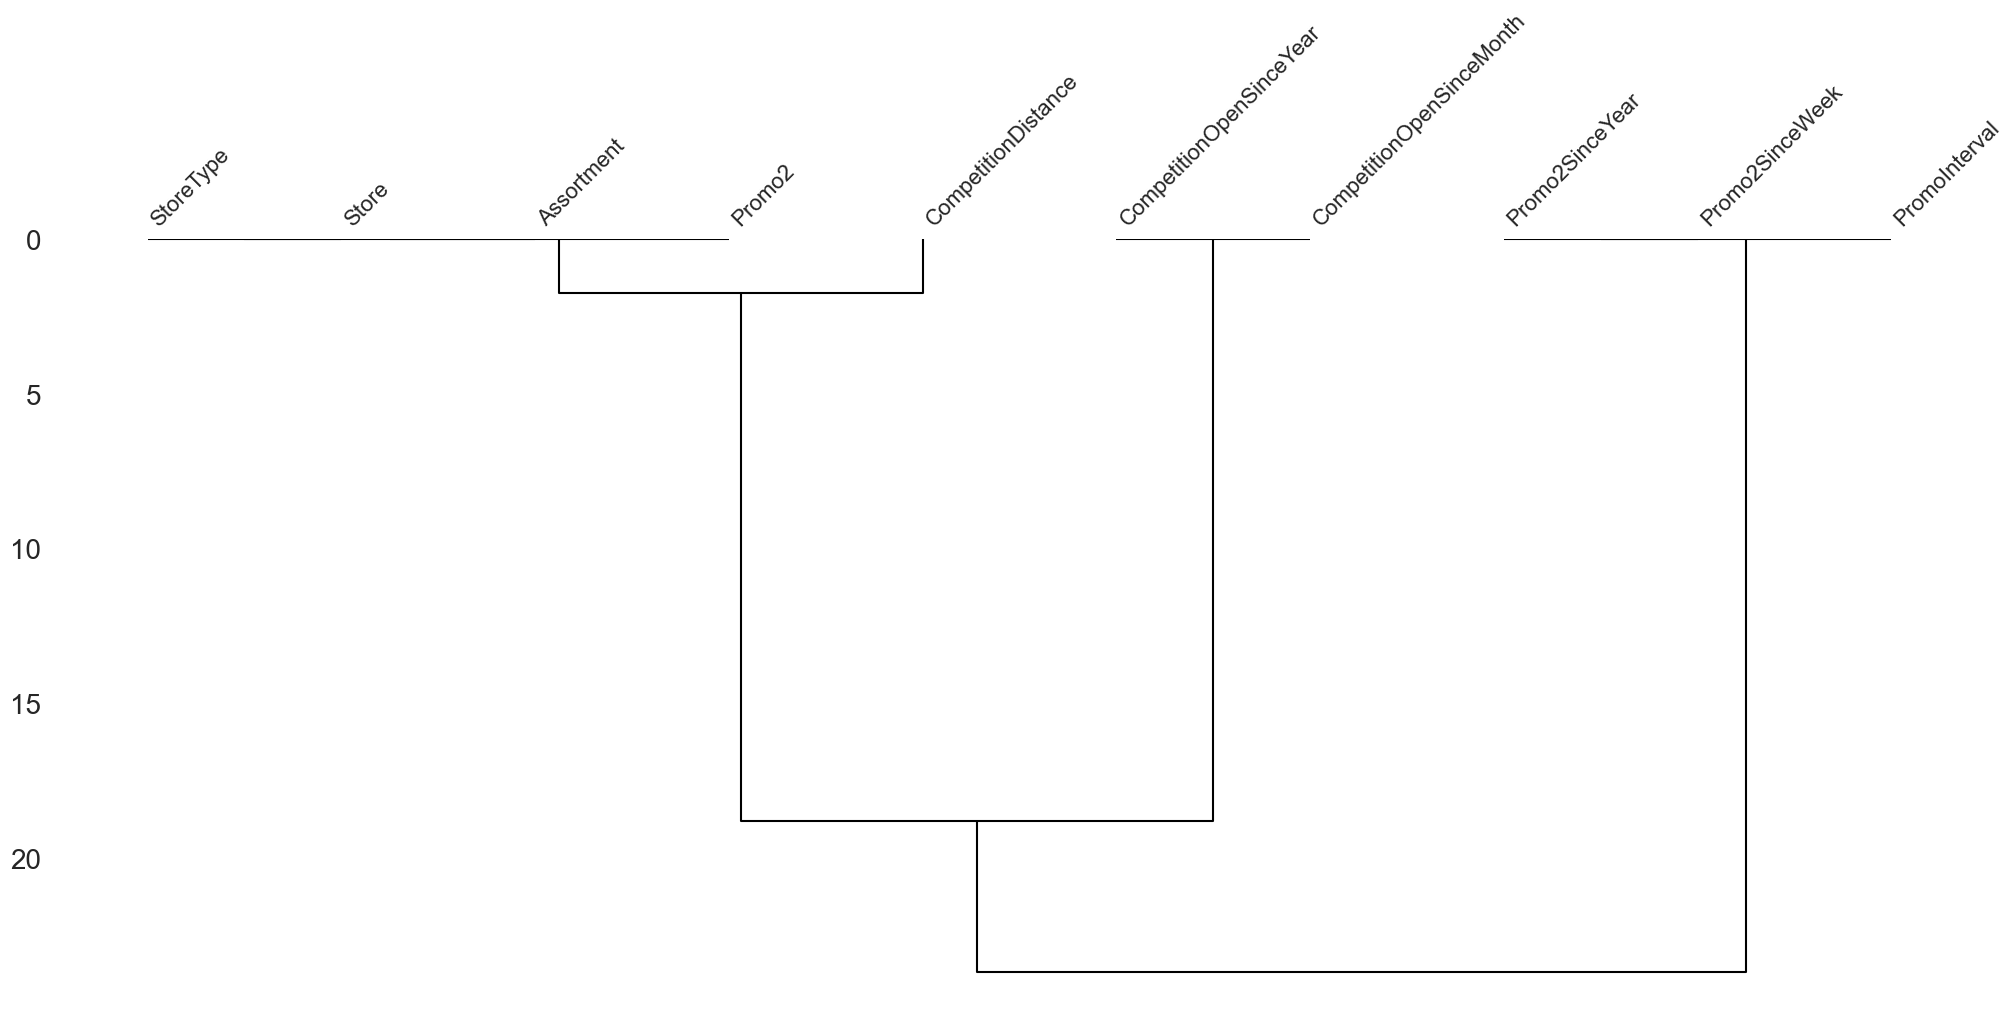

In [25]:
#dendrogram plots a hierarchical clustering of columns based on the missingness pattern. 
# This helps in understanding the relationship between columns with similar patterns of missing data.
msno.dendrogram(store)

In [26]:
test[test.isnull().values==True]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [27]:
store[store['CompetitionDistance'].isnull().values==True]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [28]:
test.fillna(1,inplace=True)
store.CompetitionDistance = store.CompetitionDistance.fillna(store.CompetitionDistance.median())
store.fillna(0,inplace=True)

In [29]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [30]:
year_month_0 = store.loc[(store.CompetitionOpenSinceMonth==0) | (store.CompetitionOpenSinceYear==0)].copy()
no_competition = store.loc[(store.CompetitionOpenSinceMonth==0) | (store.CompetitionOpenSinceYear==0) | (store['CompetitionDistance'].isnull())].copy()
year_month_0
year_month_0_check = year_month_0.CompetitionOpenSinceMonth + year_month_0.CompetitionOpenSinceYear
(year_month_0_check==0).all()

True

In [31]:
year_month_0

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,0.0,0.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,0.0,0.0,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,0.0,0.0,0,0.0,0.0,0
18,19,a,c,3240.0,0.0,0.0,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,0.0,0.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,0.0,0.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,0.0,0.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [32]:
no_competition

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,0.0,0.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,0.0,0.0,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,0.0,0.0,0,0.0,0.0,0
18,19,a,c,3240.0,0.0,0.0,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,0.0,0.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,0.0,0.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,0.0,0.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [33]:
promo2_0 = store.loc[(store.Promo2==0)|(store.Promo2SinceWeek==0)|(store.Promo2SinceYear==0)|(store.PromoInterval==0), \
                    ["Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"]].copy()

In [34]:
(promo2_0.sum(axis=1)==0).all()

True

In [35]:
#NaNs in competitionDistance and promo columns indicates a feature/property that shouldnt be ignored. Initially they are filled with 0s. further processing can be done later. 

#merge information from the store table
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

In [36]:
#sine function usage: for capturing the changes (increase or decrease) in the pattern smoothly.
#cosine function usage: for capturing the phase change in the pattern.
def get_embedded_feature(df):
    pi_value = np.round(np.pi,5)
    df = df.sort_values(["Store","Date","Month","Weekday"], ascending=True)
    df[["Day","Month","Weekday"]] = df[["Day","Month","Weekday"]].astype(np.float32)
    df.loc[df["Month"].isin([1,3,5,7,8,10,12]), "Day"] = np.sin(2*pi_value*df.loc[df["Month"].isin([1,3,5,7,8,10,12]),"Day"]/31)
    df.loc[df["Month"].isin([2,4,6,9,11]), "Day"] = np.sin(2*pi_value*df.loc[df["Month"].isin([2,4,6,9,11]), "Day"]/30)
    df.loc[:,"Month"] = np.sin(2*pi_value*df["Month"]/12)
    df.loc[:, "Weekday"] = np.sin(2*pi_value*df["Weekday"]/5)
    df.loc[:, "Day"] = np.sin(2*pi_value*df["Day"]/365)
    df.loc[:, "WeekOfYear"] = np.sin(2*pi_value*df["WeekOfYear"]/52)
    df.loc[:, "WeekOfMonth"] = np.sin(2*pi_value*df["WeekOfMonth"]/5)
    df.loc[:, "Weekday"] = np.sin(2*pi_value*df["Weekday"]/7)
    return df

#a past value from a previous time period (lag feature) (e.g., previous day, week, or month) that is used as an input variable in time series forecasting or predictive modeling
#helps capture the temporal dependencies between past and future values, expecially when current values depend on past values 
#Stock Prices,Sales Forecasting, Weather Prediction, etc.
#transformaion is necessary to 
def get_weekday_lag_feature(df, lag=1):
    sales_col = str(lag)+"Weekday"+"_"+"sales"
    agg_col = ["Store","Promo","Year","Weekday"]
    df.sort_values(by=['Store', 'Promo', 'Year', 'Weekday'], inplace=True)
    df.loc[:,sales_col] = df.groupby(agg_col)["Sales"].transform(lambda x:x.shift(lag))   #introducing a lag in each group of the Sales column, grouped by "Store","Promo","Year", and "Weekday".
    df.loc[:,sales_col] = df.groupby(agg_col)[sales_col].transform(lambda x:x.ffill())    #"forward fill", method used to fill missing values (i.e., NaN values) in a DataFrame/series (in this case multiple series and entries).
#     fill_na_col = df.loc[df[sales_col].isna(),:].groupby(agg_col)["Sales"].expanding().mean().reset_index()
#     fill_na_col.rename({"Sales":"fill_Sales"}, axis=1, inplace=True)
#     df.loc[:,sales_col] = df.merge(fill_na_col, left_on=agg_col, right_on=agg_col, how="left").pipe(lambda df: df[sales_col].fillna(df["fill_Sales"]))
    return df

def get_week_lag_feature(df, lag=1):
    sales_col = str(lag)+"WeekOfMonth"+"_"+"sales"
    agg_col = ["Store","Promo","Year","Month","WeekOfMonth"]
    feature = df.groupby(agg_col)["Sales"].mean().reset_index()
    feature.loc[:,"Sales"] = feature.groupby(["Store","Year","WeekOfMonth"])["Sales"].transform(lambda x:x.shift(lag))
    feature.rename({"Sales":sales_col}, axis=1, inplace=True)      #renaming the columns features
    df = df.merge(feature, left_on=agg_col, right_on=agg_col, how="left")
#     fill_na_col = df.loc[df[sales_col].isna(),:].groupby(agg_col)["Sales"].expanding().mean().reset_index()
#     fill_na_col.rename({"Sales":"fill_Sales"}, axis=1, inplace=True)
#     df.loc[:,sales_col] = df.merge(fill_na_col, left_on=agg_col, right_on=agg_col, how="left").pipe(lambda df: df[sales_col].fillna(df["fill_Sales"]))
    return df

def get_month_lag_feature(df, lag=1):
    sales_col = str(lag)+"Month"+"_"+"sales"
    agg_col = ["Store","Year","Month"]
    feature = df.groupby(agg_col)["Sales"].mean().reset_index()
    feature.loc[:,"Sales"] = feature.groupby(["Store","Month"])["Sales"].transform(lambda x:x.shift(lag))
    feature.rename({"Sales":sales_col}, axis=1, inplace=True)
    df = df.merge(feature, left_on=agg_col, right_on=agg_col, how="left")
#     fill_na_col = df.loc[df[sales_col].isna(),:].groupby(agg_col)["Sales"].expanding().mean().reset_index()
#     fill_na_col.rename({"Sales":"fill_Sales"}, axis=1, inplace=True)
#     df.loc[:,sales_col] = df.merge(fill_na_col, left_on=agg_col, right_on=agg_col, how="left").pipe(lambda df: df[sales_col].fillna(df["fill_Sales"]))
    return df

In [37]:
def build_features(features, data):

    features.extend(['Store','CompetitionDistance','CompetitionOpenSinceMonth','StateHoliday','StoreType','Assortment',
                     'SchoolHoliday','CompetitionOpenSinceYear', 'Promo', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear'])
    
    features.extend(['Year','Month','Day','DayOfWeek','WeekOfYear'])
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.isocalendar().week
    
    features.extend(['CompetitionOpen','PromoOpen'])
    data['CompetitionOpen'] = 12*(data.Year-data.CompetitionOpenSinceYear) + (data.Month-data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12*(data.Year-data.Promo2SinceYear) + (data.WeekOfYear-data.Promo2SinceWeek)/4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)

    features.append('IsPromoMonth')
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval==0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1

    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    data['StoreType'] = data['StoreType'].astype(int)
    data['Assortment'] = data['Assortment'].astype(int)
    data['StateHoliday'] = data['StateHoliday'].astype(int)
    
    #returns day of the week to integer: weekday()
    #.replace() Replaces the day with the 1st of the current month
    #retrieved the first day of the month (so that month and year do not change). 
    first_curr_day = [(x.replace(day=1).weekday(), x.day) for x in data["Date"]]
    week_of_month = [(x[0]+x[1]-1)//7+1 for x in first_curr_day]    
    data.loc[:,"WeekOfMonth"] = week_of_month
    data.loc[:,"Weekday"] = [x.weekday() for x in data["Date"]]

    data.sort_values(["Store","Date"], ascending=True, inplace=True)
    data = get_weekday_lag_feature(data,lag=1)
    data.sort_values(["Store","Date"], ascending=True, inplace=True)
    data.loc[:,'1Weekday_sales'] = np.log(data['1Weekday_sales'])
    features.extend(["WeekOfMonth","Weekday","1Weekday_sales"])                                                                                                                         

In [38]:
train.Date = pd.to_datetime(train.Date, errors='coerce')
test.Date = pd.to_datetime(test.Date, errors='coerce')
train.reset_index(inplace=True)
test.reset_index(inplace=True)
df = pd.concat([train, test], axis=0)

features = []

build_features(features, df)
df.set_index(["Store","Date"], inplace=True)
train.set_index(["Store","Date"], inplace=True)
test.set_index(["Store","Date"], inplace=True)
train = df.loc[train.index, :].copy()
test = df.loc[test.index, :].copy()


test.drop(["Sales"], axis=1, inplace=True)
print(test.isna().any())
test.loc[:,"1Weekday_sales"] = test.groupby(["Store"])["1Weekday_sales"].transform(lambda x:x.ffill())
print(test.isna().any())

print(train.isna().any())
print(train.shape)

print(features)

C:\Users\17807\AppData\Local\Temp\ipykernel_28756\4039172831.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.StoreType.replace(mappings, inplace=True)
C:\Users\17807\AppData\Local\Temp\ipykernel_28756\4039172831.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.StoreType.replace(ma

index                        False
DayOfWeek                    False
Customers                     True
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
Id                           False
Year                         False
Month                        False
Day                          False
WeekOfYear                   False
CompetitionOpen              False
PromoOpen                    False
monthStr                     False
IsPromoMonth                 False
WeekOfMonth                  False
Weekday                      False
1Weekday_sales                True
dtype: bool
index   

In [39]:
train.reset_index(["Store","Date"],inplace=True)
test.reset_index(["Store","Date"], inplace=True)

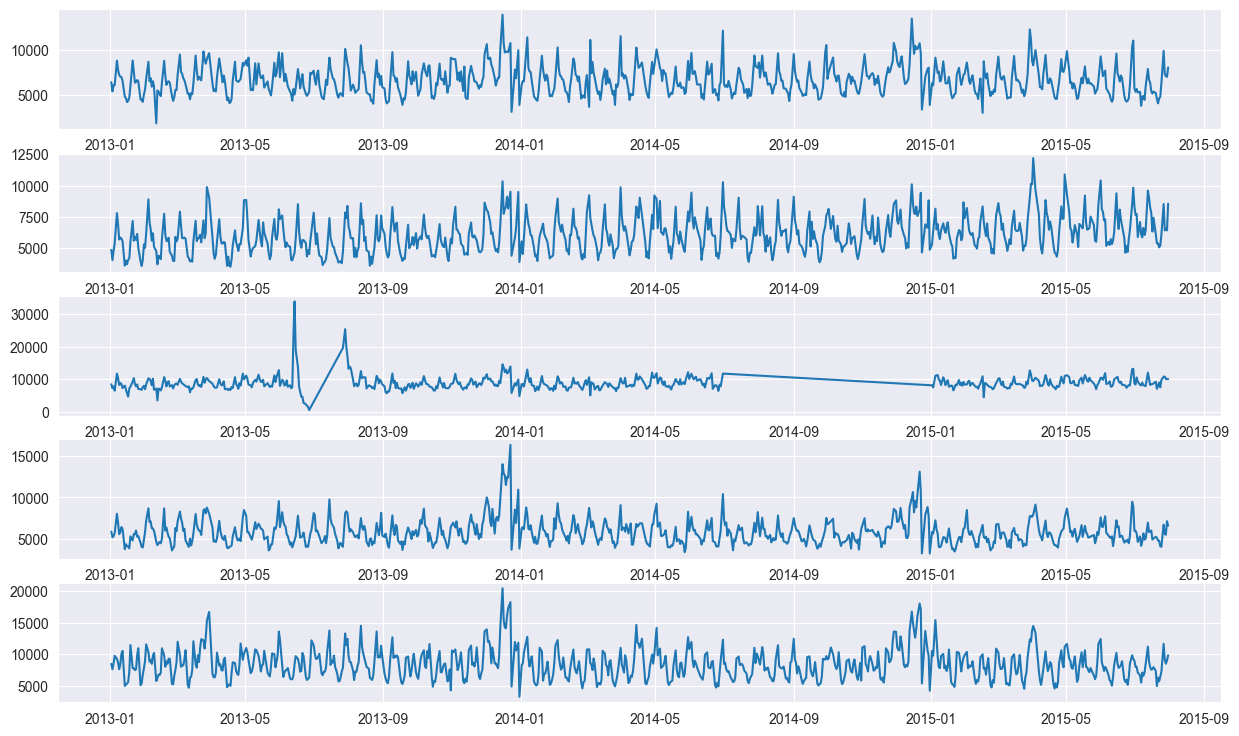

In [40]:
# n_sample = 5
# random_store = train.Store.drop_duplicates().sample(n_sample)
# fig, axes = plt.subplots(n_sample, figsize=(15,9))
# for i in range(n_sample):
#     axes[i].plot(train.loc[train.Store==random_store.iloc[i], ["Date","Sales"]].sort_values("Date").set_index("Date"))
# plt.show()

n_sample = 5
random_store = train.Store.drop_duplicates().sample(n_sample)
fig, axes = plt.subplots(n_sample, figsize=(15,9))
for i in range(n_sample):
    axes[i].plot(train.loc[train.Store==random_store.iloc[i], ["Date","Sales"]].set_index("Date"))
plt.show()


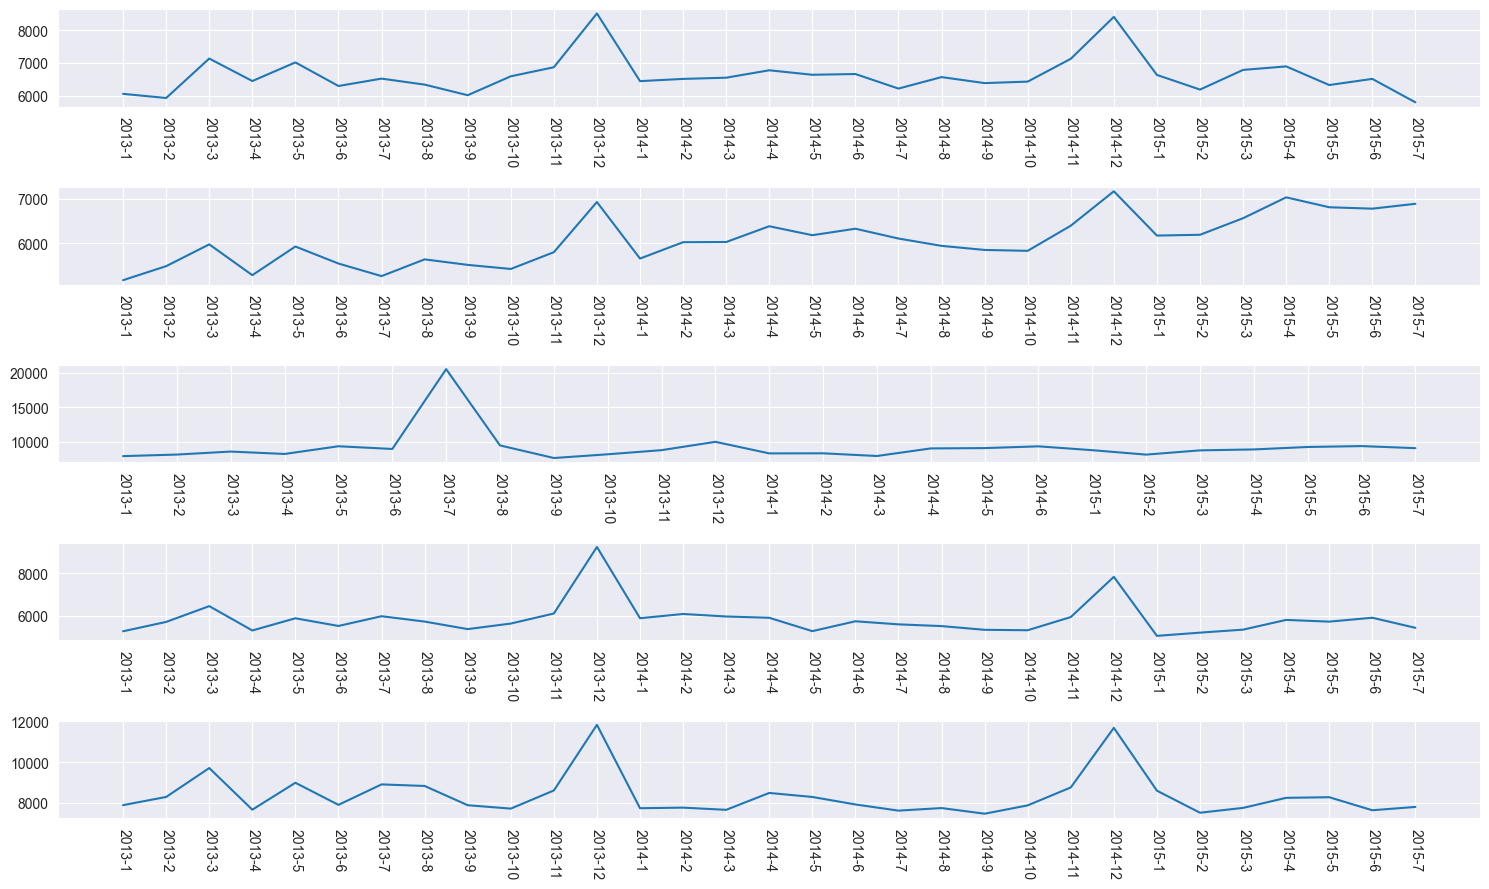

In [41]:
fig, axes = plt.subplots(n_sample, figsize=(15,9))
for i in range(n_sample):
    train_month = train.loc[train.Store==random_store.iloc[i], ["Date","Sales","Year","Month"]].\
                 sort_values("Date").set_index("Date").\
    groupby(["Year","Month"], group_keys=False)["Sales"].mean()
    train_month = train.loc[train.Store==random_store.iloc[i], ["Date","Sales","Year","Month"]].sort_values("Date").set_index("Date").groupby(["Year","Month"], group_keys=False)["Sales"].mean()
    # print(train_month)
    # print(train_month.index.tolist())
    train_month.index = [str(x[0])+"-"+str(x[1]) for x in train_month.index.tolist()]
    axes[i].plot(train_month)
    axes[i].tick_params(axis='x', rotation=-90) 
plt.tight_layout()
plt.show()

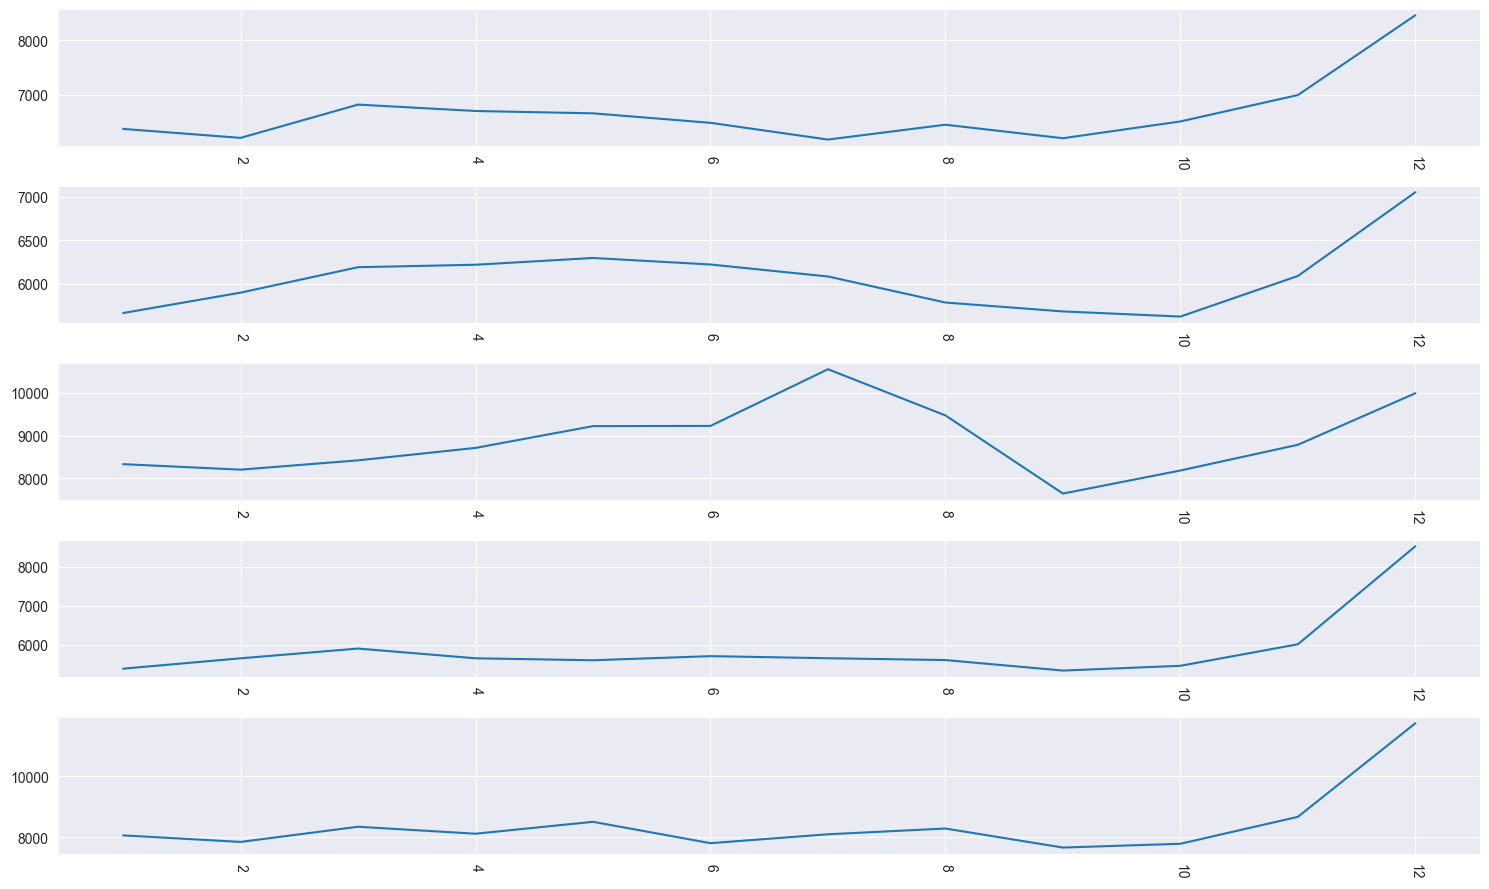

In [42]:
fig, axes = plt.subplots(n_sample, figsize=(15,9))
for i in range(n_sample):
    train_month = train.loc[train.Store==random_store.iloc[i], ["Date","Sales","Year","Month"]].sort_values("Date").set_index("Date").groupby(["Month"], group_keys=True)["Sales"].mean()
    axes[i].plot(train_month)
    axes[i].tick_params(axis='x', rotation=-90) 
plt.tight_layout()
plt.show()

In [43]:
first_curr_day = [(x.replace(day=1).weekday(), x.day) for x in train["Date"]]
week_of_month = [(x[0]+x[1]-1)//7+1 for x in first_curr_day] 
#inorder to retrieve the week of the month for each dates, we need to compute the first current day. 
train.loc[:,"WeekOfMonth"] = week_of_month
train

,Store,Date,index,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,monthStr,IsPromoMonth,WeekOfMonth,Weekday,1Weekday_sales
0,1,2015-07-31,0,4,5263.0,555.0,1.0,1,0,1,...,7,31,31,82.0,24187.75,Jul,0,5,4,8.487146
1,2,2015-07-31,1,4,6064.0,625.0,1.0,1,0,1,...,7,31,31,92.0,64.50,Jul,1,5,4,8.415825
2,3,2015-07-31,2,4,8314.0,821.0,1.0,1,0,1,...,7,31,31,103.0,52.25,Jul,1,5,4,8.806724
3,4,2015-07-31,3,4,13995.0,1498.0,1.0,1,0,1,...,7,31,31,70.0,24187.75,Jul,0,5,4,9.260463
4,5,2015-07-31,4,4,4822.0,559.0,1.0,1,0,1,...,7,31,31,3.0,24187.75,Jul,0,5,4,8.379080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2013-01-01,844333,1,3375.0,566.0,1.0,0,1,1,...,1,1,1,76.0,24156.25,Jan,0,1,1,NaN
844334,733,2013-01-01,844334,1,10765.0,2377.0,1.0,0,1,1,...,1,1,1,159.0,24156.25,Jan,0,1,1,NaN
844335,769,2013-01-01,844335,1,5035.0,1248.0,1.0,0,1,1,...,1,1,1,24157.0,0.25,Jan,1,1,1,NaN
844336,948,2013-01-01,844336,1,4491.0,1039.0,1.0,0,1,1,...,1,1,1,24157.0,24156.25,Jan,0,1,1,NaN


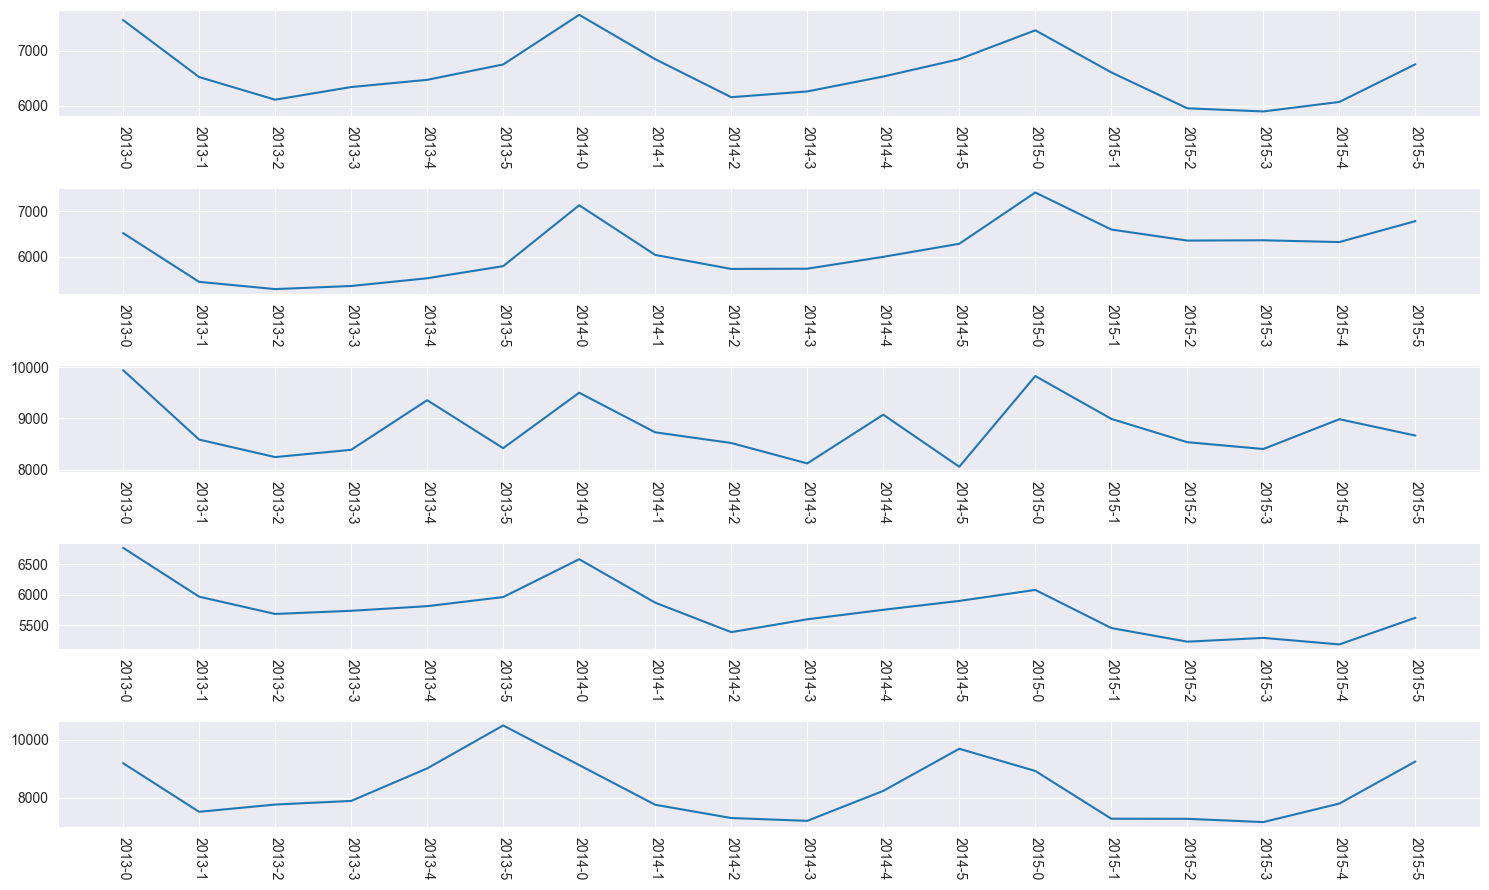

In [44]:
train.loc[:,"Weekday"] = [x.weekday() for x in train["Date"]]
fig, axes = plt.subplots(n_sample, figsize=(15,9))
for i in range(n_sample):
    train_month = train.loc[train.Store==random_store.iloc[i], ["Date","Sales","Year","Weekday"]].\
                 sort_values("Date").set_index("Date").\
    groupby(["Year","Weekday"], group_keys=False)["Sales"].mean()
    train_month.index = [str(x[0])+"-"+str(x[1]) for x in train_month.index.tolist()]
    axes[i].plot(train_month)
    #axes[i].tick_params(axis='x')
    axes[i].tick_params(axis='x', rotation=-90) # parameters for labelling, enhancing readability of the tick labels
plt.tight_layout()
plt.show()

In [45]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y-yhat)**2))
    return rmspe

def rmspe_xg(yhat, y):
    y = y.get_label()
    y = np.expm1(y)
    yhat = np.expm1(yhat)
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y-yhat)**2))
    return "rmspe", rmspe

def neg_rmspe(yhat, y):
    y = np.expm1(y)
    yhat = np.expm1(yhat)
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y-yhat)**2))
    return -rmspe

def neg_mean_squared_error(yhat, y):
    return np.sqrt(np.mean((y-yhat)**2))

def neg_mean_absolute_error(yhat, y):
    return np.sqrt(np.mean((y-yhat).abs()))

In [46]:
class TimeSeriesSplit:
    def __init__(self, n_splits, test_length):
        self.test_length = test_length
        self.n_splits = n_splits
        
    @staticmethod
    def chunk(unique_dates, test_length):
        for i in range(0, len(unique_dates), test_length):
            yield unique_dates[i:i + test_length]
    
    def split(self, X, y=None, groups=None):
        unique_dates = X.index.get_level_values("Date").drop_duplicates().sort_values(ascending=True).tolist()[-self.n_splits*self.test_length:]
        date_df = X.reset_index()[["Date"]]
        for test_date in self.chunk(unique_dates, self.test_length):
            train_idx = date_df[date_df.Date<min(test_date)].index
            test_idx = date_df[date_df.Date.isin(test_date)].index
            yield train_idx, test_idx
        
    def get_n_splits(self, X, y, groups=None):
        return self.n_splits

In [47]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_validate
from sklearn.metrics import make_scorer

from sklearn.tree import DecisionTreeRegressor

train_temp = train.copy()
# train_temp.set_index(["Date"], inplace=True)

In [48]:
#pip install -U scikit-learn scipy matplotlib

In [49]:
params = {"criterion":"squared_error",
          "max_depth":10,
          "min_samples_split":0.01,
          "min_samples_leaf":0.004,
          "max_leaf_nodes":50,
          "random_state":42,
         }
            
reg = DecisionTreeRegressor(**params)

In [50]:
neg_rmspe_error = make_scorer(neg_rmspe)
score_metric = {"neg_mean_squared_error":"neg_mean_squared_error",
                "neg_mean_absolute_error":"neg_mean_absolute_error",
                "neg_rmspe": neg_rmspe_error}
cv = TimeSeriesSplit(5,40)
def run_cv(X,y):
    scores = cross_validate(estimator=reg, X=X, y=y, scoring=score_metric, cv = cv,\
                                               n_jobs=-1, return_train_score=True )
    return scores

In [51]:
%%time
if "Date" in train.columns:
    train.set_index(["Date"], inplace=True)
train_temp = train[features+["Sales"]].dropna().copy()
scores = run_cv(train_temp[features], np.log(train_temp.Sales))
scores

CPU times: total: 375 ms
Wall time: 4.71 s


{'fit_time': array([2.36348295, 2.53044701, 2.69540954, 2.81738234, 2.94535518]),
 'score_time': array([0.00599957, 0.00599933, 0.0059979 , 0.00599957, 0.00500154]),
 'test_neg_mean_squared_error': array([-0.0272662 , -0.02648759, -0.03905774, -0.02891224, -0.02366011]),
 'train_neg_mean_squared_error': array([-0.03196476, -0.0316837 , -0.03138817, -0.03173352, -0.0315676 ]),
 'test_neg_mean_absolute_error': array([-0.11784   , -0.11551824, -0.15148301, -0.12646405, -0.11772825]),
 'train_neg_mean_absolute_error': array([-0.12978947, -0.12900541, -0.12827228, -0.12944474, -0.12923304]),
 'test_neg_rmspe': array([-0.1619761 , -0.20986299, -0.19786971, -0.18712251, -0.1587154 ]),
 'train_neg_rmspe': array([-0.19091588, -0.18940759, -0.18998702, -0.19043349, -0.19005403])}

In [197]:
from sklearn.utils import parallel_backend

param_grid = {'max_depth': np.linspace(10,60,3,dtype=int),
              'min_samples_leaf': np.linspace(0.01,0.03,3),
              "min_samples_split": [0.04],
              "max_leaf_nodes": np.linspace(40,100,2,dtype=int),
              "criterion":["squared_error"],
              "ccp_alpha":[0.05,0.1]}
# param_grid = {"max_depth":np.linspace(10,20,2,dtype=int)}
cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.2)

neg_rmspe_error = make_scorer(neg_rmspe)
gridsearch_clf = GridSearchCV(estimator=reg,
                          param_grid=param_grid,
                          scoring=neg_rmspe_error,
                          n_jobs=-1,
                          cv=cv, 
                          refit=True,
                          return_train_score=True)

grid_model = gridsearch_clf.fit(train_temp[features], np.log(train_temp.Sales))
    

In [198]:
grid_model_params = grid_model.get_params()
best_model = grid_model.best_estimator_
y_pred = best_model.predict(train_temp[features])
y_true = np.log(train_temp.Sales)
print(rmspe(y_pred, y_true))
print(neg_rmspe(y_pred, y_true))

0.03519135284362243
-0.38265038236815097


In [199]:
print(grid_model_params)

{'cv': <__main__.TimeSeriesSplit object at 0x00000276617580D0>, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'squared_error', 'estimator__max_depth': 10, 'estimator__max_features': None, 'estimator__max_leaf_nodes': 50, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 0.004, 'estimator__min_samples_split': 0.01, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 42, 'estimator__splitter': 'best', 'estimator': DecisionTreeRegressor(max_depth=10, max_leaf_nodes=50, min_samples_leaf=0.004,
                      min_samples_split=0.01, random_state=42), 'n_jobs': -1, 'param_grid': {'max_depth': array([10, 35, 60]), 'min_samples_leaf': array([0.01, 0.02, 0.03]), 'min_samples_split': [0.04], 'max_leaf_nodes': array([ 40, 100]), 'criterion': ['squared_error'], 'ccp_alpha': [0.05, 0.1]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': make_scorer(neg_rmspe), 'verbose': 0}


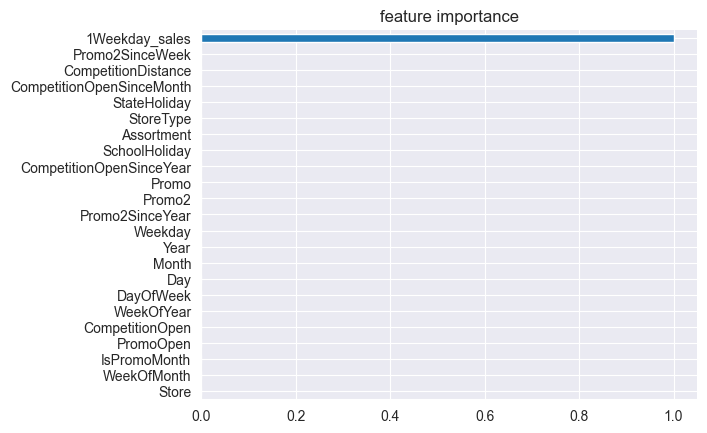

In [200]:
def get_feature_importance_plot(clf, features):
    ser = pd.Series(clf.feature_importances_, index=features)
    ser.sort_values().plot.barh(title="feature importance")
    sns.despine()
get_feature_importance_plot(best_model, features)

In [201]:
#XGboost
params = {'objective': 'reg:linear',
          'eta': 0.01,
          'max_depth': 11,
          'subsample': 0.5,
          'colsample_bytree': 0.5,
          'silent': 1,
          'seed': 1
          }
num_trees = 100

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
import xgboost as xgb

X_train, X_test = train_test_split(train, test_size=0.2, random_state=2)

dtrain = xgb.DMatrix(X_train[features], np.log1p(X_train.Sales))
dvalid = xgb.DMatrix(X_test[features], np.log1p(X_test.Sales))
if "Date" in test.columns:
    test.set_index(["Date"],inplace=True)
dtest = xgb.DMatrix(test[features])

watchlist = [(dtrain, 'train'),(dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_trees, evals=watchlist, early_stopping_rounds=50, feval=rmspe_xg, verbose_eval=False)

C:\Users\17807\PycharmProjects\rossman_project\.venv\lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
C:\Users\17807\PycharmProjects\rossman_project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:07:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\17807\PycharmProjects\rossman_project\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [15:07:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: 

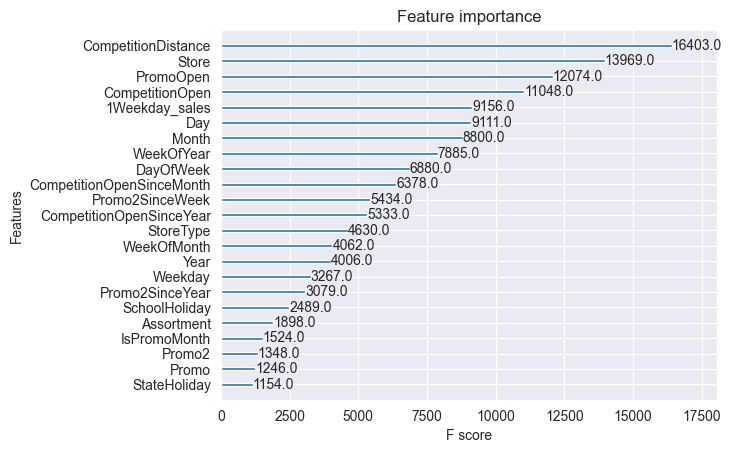

In [206]:
#Fscore tells us how many times a feature has been used to split the data across all trees in the model, or the "weight" of a feature in predicting the target variable
#useful in feature selection and model interpretation
xgb.plot_importance(gbm)
plt.show()

In [207]:
import sklearn
#from sklearn.xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
params_xgb =  { 'max_depth': range(2,14,2),
          'min_child_weight': [1, 5, 10],
          'subsample': [0.5,0.7],
          'colsample_bytree': [0.5,0.7],
          'gamma': [0.5, 1, 1.5, 2, 5],
          "reg_lambda" : [0.1,1,10],
          "reg_alpha" : [0.1,1,10]
          }
param_comb = 5
rmspe_error = make_scorer(rmspe)
cv = TimeSeriesSplit(4,50)
if "Date" in X_train.columns:
    X_train.set_index(["Date"], inplace=True)

xgb_reg = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600)
random_search = RandomizedSearchCV(xgb_reg, param_distributions=params_xgb, n_iter=param_comb, scoring=rmspe_error, n_jobs=-1, cv=cv, verbose=3, random_state=1001 )
random_search.fit(X_train[features], np.log1p(X_train.Sales))

Fitting 4 folds for each of 5 candidates, totalling 20 fits


RandomizedSearchCV(cv=<__main__.TimeSeriesSplit object at 0x00000277243FCA30>,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_ty...
                                          multi_strategy=None, n_estimators=600,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': range(2, 14, 2),
                                        'min_child_weight': [1, 5, 10],
                                        'reg_alpha': [0.1, 1, 10],
                                        'reg_lambda': [0.1, 1, 10],
                                        'subsample': [0.5, 0.7]},
                   random_state=1001, scoring=make_scorer(rmspe), verbose=3)

In [ ]:
#import sklearn
#!pip install scikit-learn==1.3.1
#from sklearn.model_selection import RandomizedSearchCV
#pip uninstall sklearn --yes
#pip uninstall scikit-learn --yes
#print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [208]:
best_params = random_search.best_params_

X_train, X_test = train_test_split(train, test_size=0.2, random_state=2)

dtrain = xgb.DMatrix(X_train[features], np.log1p(X_train.Sales))
dvalid = xgb.DMatrix(X_test[features], np.log1p(X_test.Sales))
# test.set_index(["Date"],inplace=True)
dtest = xgb.DMatrix(test[features])

watchlist = [(dtrain, 'train'),(dvalid, 'eval')]

gbm = xgb.train(best_params, dtrain, num_trees, evals=watchlist, early_stopping_rounds=50, feval=rmspe_xg, verbose_eval=False)

C:\Users\17807\PycharmProjects\rossman_project\.venv\lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


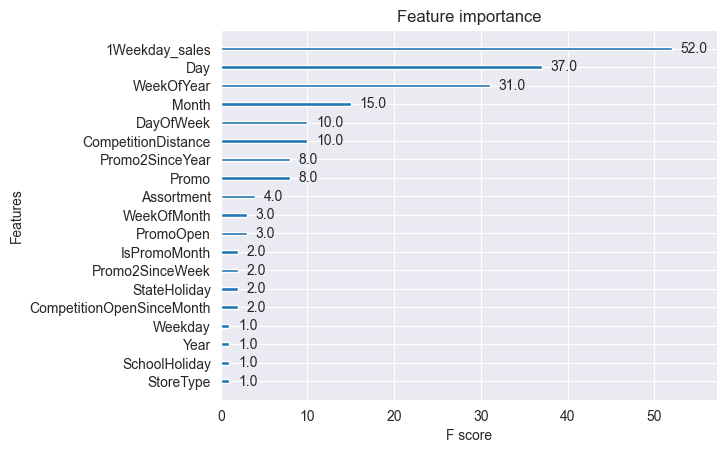

In [209]:
xgb.plot_importance(gbm)
plt.show()

In [210]:
train_prob = gbm.predict(xgb.DMatrix(X_train[features]), iteration_range=range(0, gbm.best_iteration+1))
train_prob[train_prob<0] = 0
rmspe(np.log(X_train.Sales.values), train_prob)

0.03943759628510839

In [211]:
test_probs = gbm.predict(xgb.DMatrix(test[features]), iteration_range=(0,gbm.best_iteration+1))
indices = test_probs < 0
test_probs[indices] = 0
submission = pd.DataFrame({"Id": test["Id"], "Sales": np.expm1(test_probs)})
submission["Id"] = submission["Id"].astype(np.int32)
submission.to_csv("submission.csv", index=False)

ValueError: num must be an integer with 1 <= num <= 18, not 19

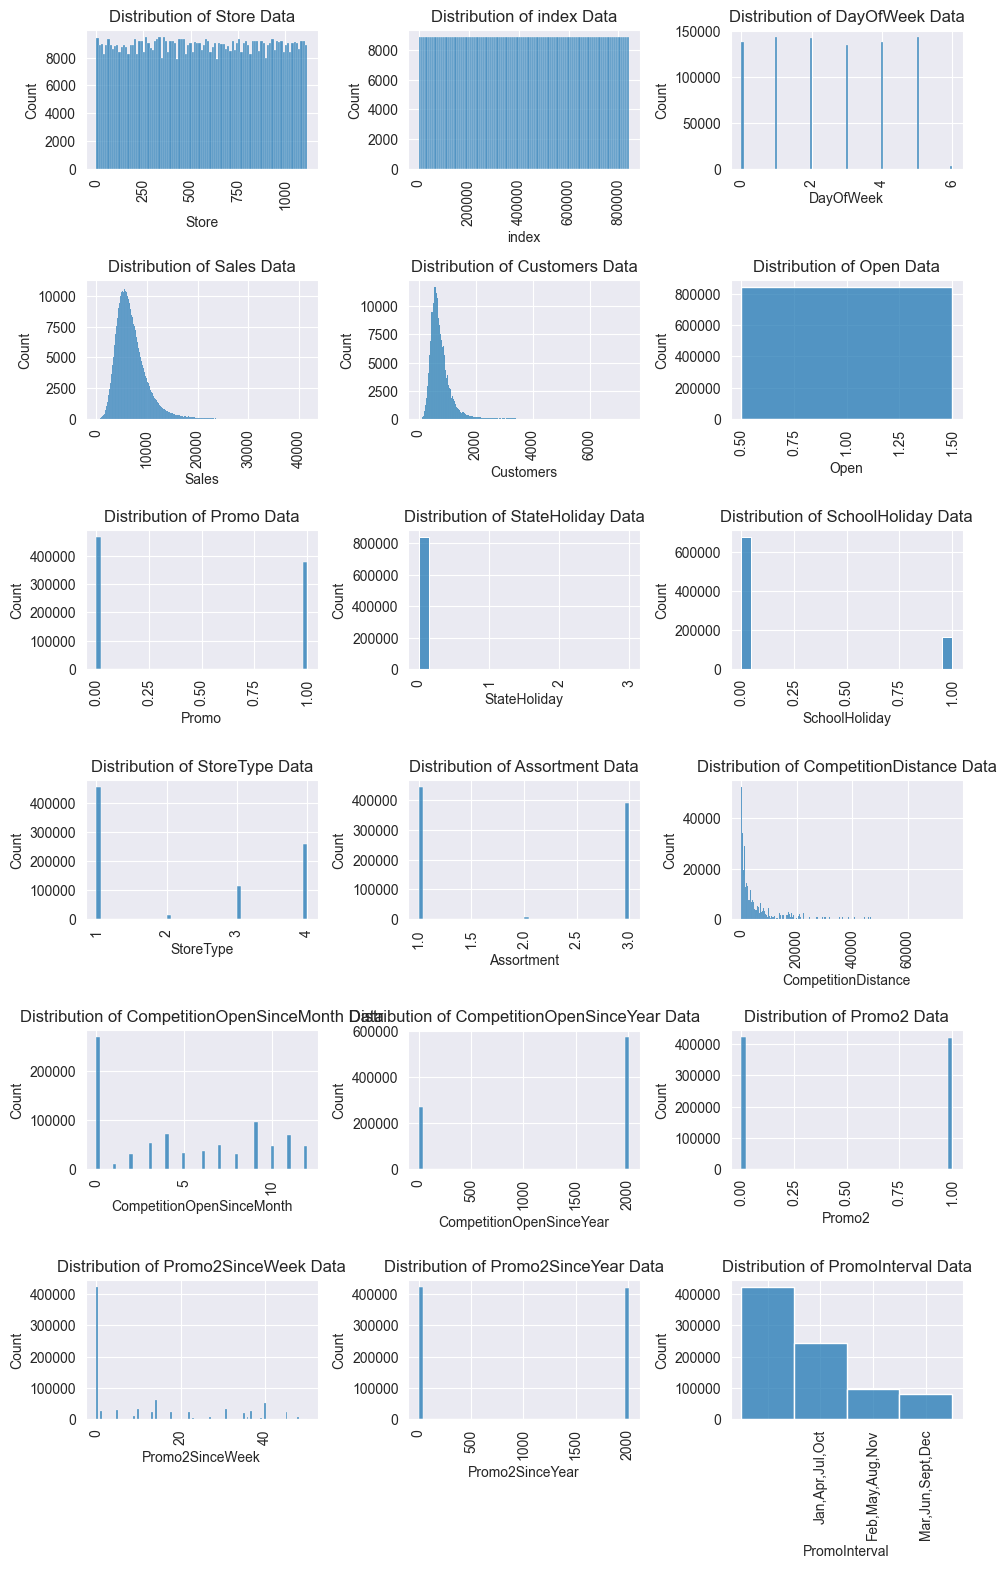

In [52]:
######Some additional explanatory data analysis steps:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.figure(figsize = (10, 15))
for i, col in enumerate(train.columns, 1):
    plt.subplot(6, 3, i)
    sns.histplot(x = train[col])
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.xticks(rotation = 90)
    plt.plot()

C:\Users\17807\AppData\Local\Temp\ipykernel_28756\3916416622.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[col], kde = True, label = "Skew = .%.2f" %(skewness))
C:\Users\17807\AppData\Local\Temp\ipykernel_28756\3916416622.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[col]

TypeError: could not convert string to float: ''

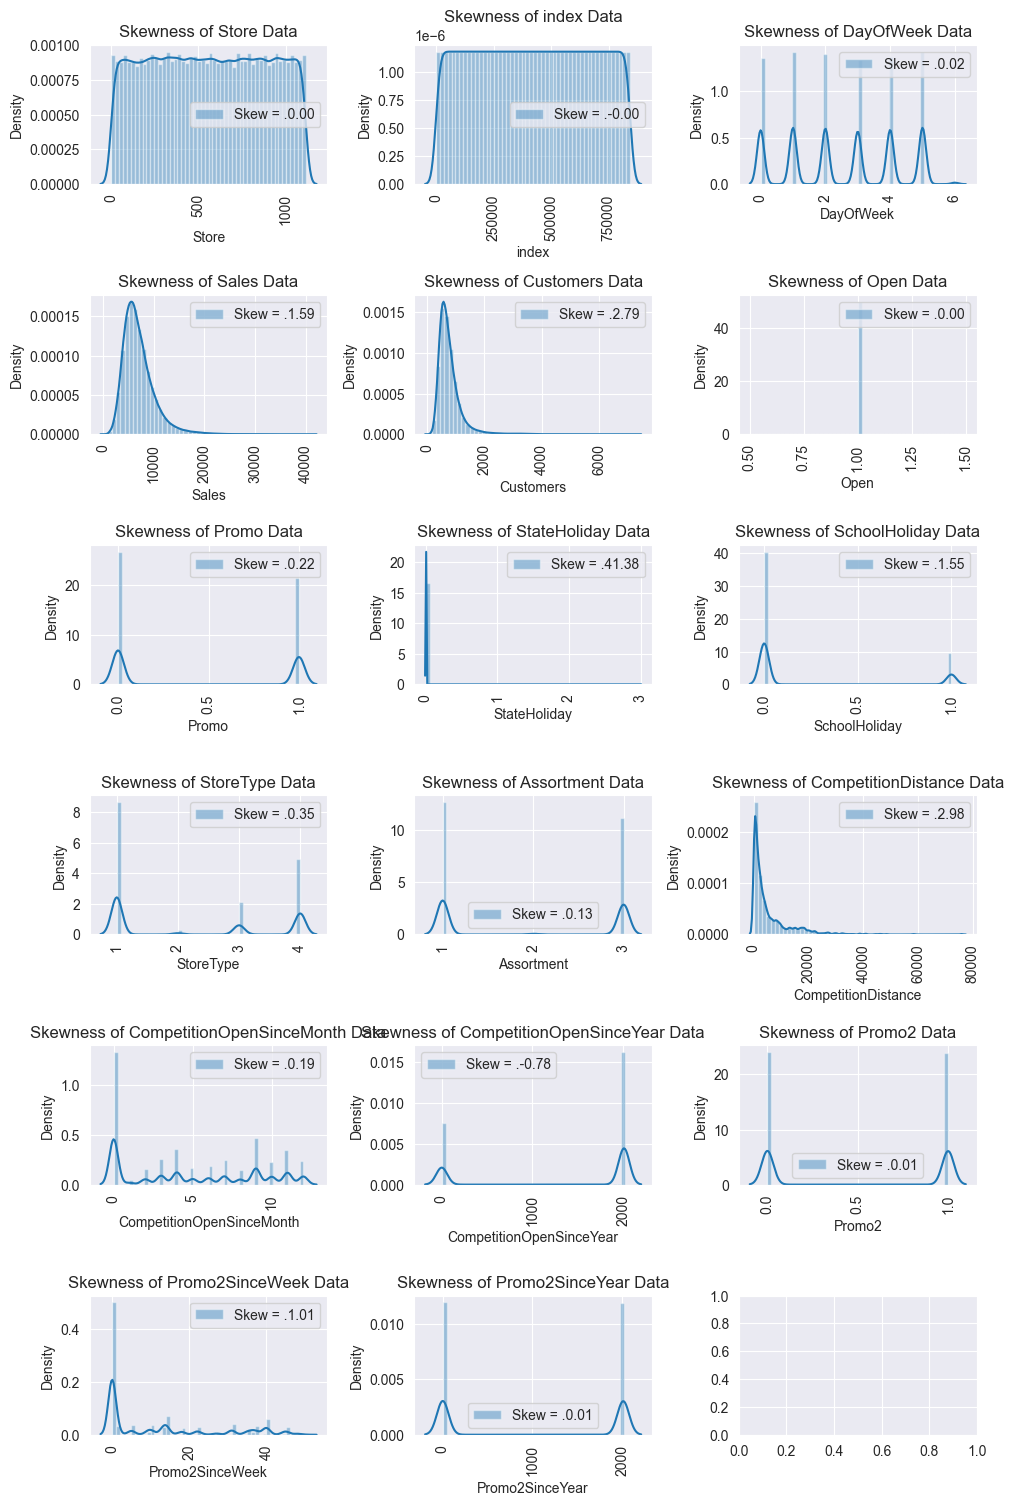

In [54]:
# Check Skewness of all feature for checking outliers
plt.figure(figsize = (10, 15))
for i, col in enumerate(train.columns[:-1], 1):
    plt.subplot(6, 3, i)
    skewness = train[col].skew()
    sns.distplot(train[col], kde = True, label = "Skew = .%.2f" %(skewness))
    plt.title(f"Skewness of {col} Data")
    plt.tight_layout()
    plt.legend(loc = "best")
    plt.xticks(rotation = 90)
    plt.plot()

In [55]:
# Remove outliers on two features
skew_cols = ["StateHoliday", "CompetitionOpenSinceYear"]
from scipy import stats
from scipy.stats import norm
for col in skew_cols:
    mean = train[col].mean()
    std_dev = train[col].std()
    z_score = (train[col] - mean) / std_dev
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
total_train = train[p_value > 0.05]
total_train

,Store,index,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,monthStr,IsPromoMonth,WeekOfMonth,Weekday,1Weekday_sales
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,0,4,5263.0,555.0,1.0,1,0,1,3,...,7,31,31,82.0,24187.75,Jul,0,5,4,8.487146
2015-07-31,2,1,4,6064.0,625.0,1.0,1,0,1,1,...,7,31,31,92.0,64.50,Jul,1,5,4,8.415825
2015-07-31,3,2,4,8314.0,821.0,1.0,1,0,1,1,...,7,31,31,103.0,52.25,Jul,1,5,4,8.806724
2015-07-31,4,3,4,13995.0,1498.0,1.0,1,0,1,3,...,7,31,31,70.0,24187.75,Jul,0,5,4,9.260463
2015-07-31,5,4,4,4822.0,559.0,1.0,1,0,1,1,...,7,31,31,3.0,24187.75,Jul,0,5,4,8.379080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,682,844333,1,3375.0,566.0,1.0,0,1,1,2,...,1,1,1,76.0,24156.25,Jan,0,1,1,NaN
2013-01-01,733,844334,1,10765.0,2377.0,1.0,0,1,1,2,...,1,1,1,159.0,24156.25,Jan,0,1,1,NaN
2013-01-01,769,844335,1,5035.0,1248.0,1.0,0,1,1,2,...,1,1,1,24157.0,0.25,Jan,1,1,1,NaN


C:\Users\17807\AppData\Local\Temp\ipykernel_28756\3589770092.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_train[col], kde = True, label = "Skew = .%.2f" %(skewness))
C:\Users\17807\AppData\Local\Temp\ipykernel_28756\3589770092.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tota

TypeError: could not convert string to float: ''

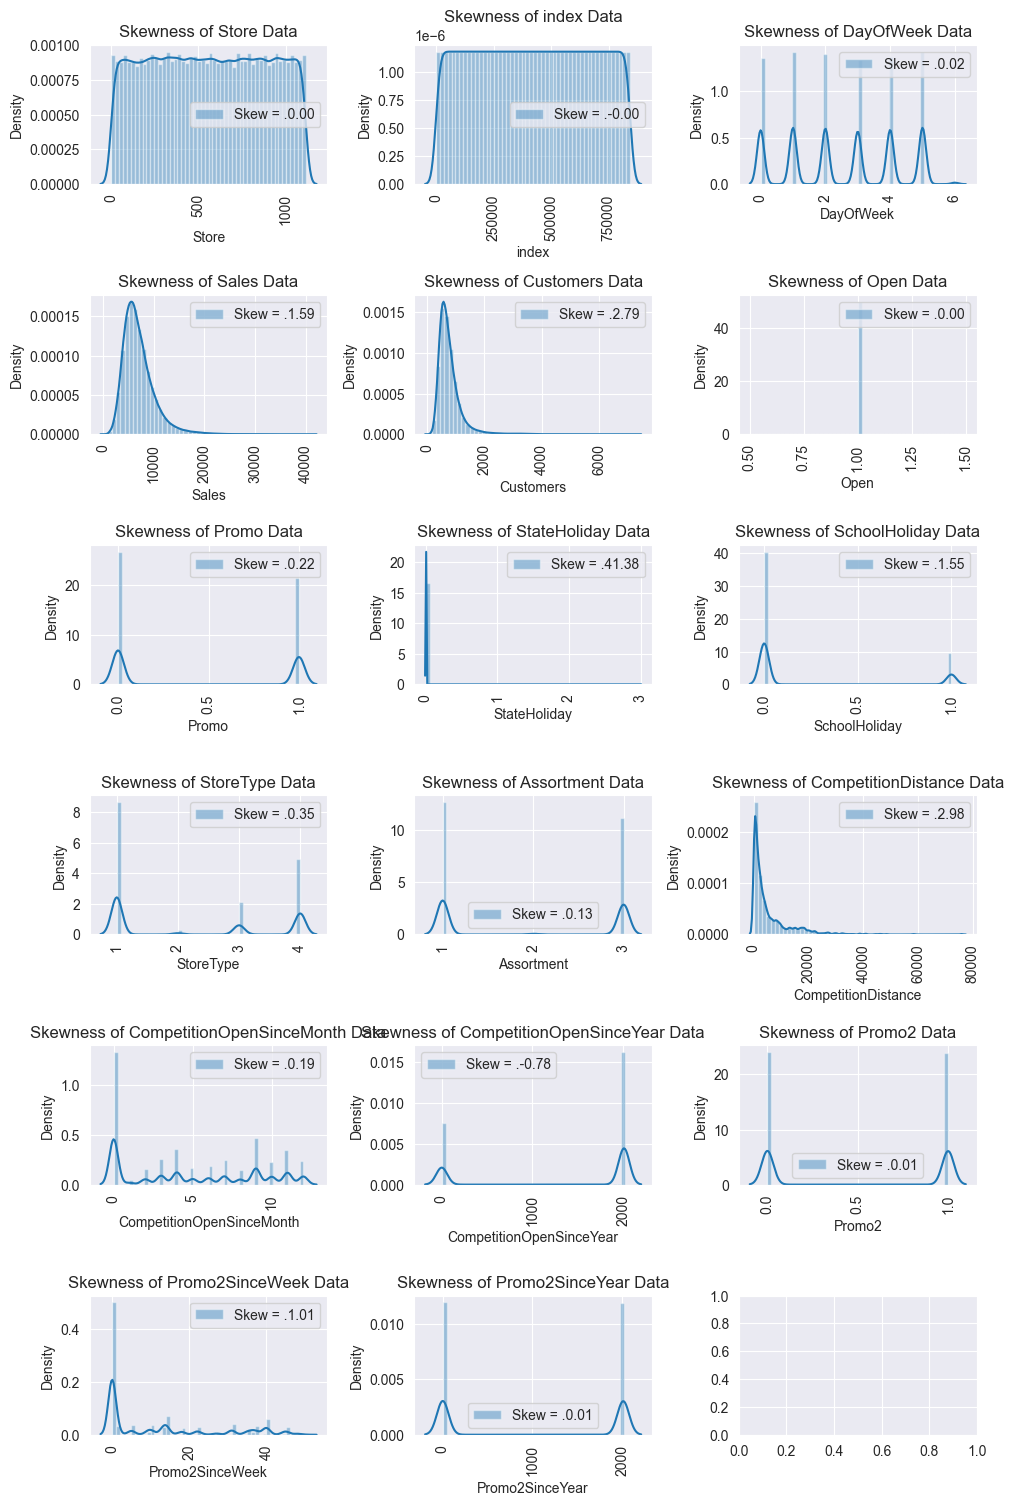

In [56]:
# Check Skewness of all feature that outliers are removed.
plt.figure(figsize = (10, 15))
for i, col in enumerate(total_train.columns[:-1], 1):
    plt.subplot(6, 3, i)
    skewness = total_train[col].skew()
    sns.distplot(total_train[col], kde = True, label = "Skew = .%.2f" %(skewness))
    plt.title(f"Skewness of {col} Data")
    plt.tight_layout()
    plt.legend(loc = "best")
    plt.xticks(rotation = 90)
    plt.plot()

C:\Users\17807\AppData\Local\Temp\ipykernel_16544\3862116018.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)


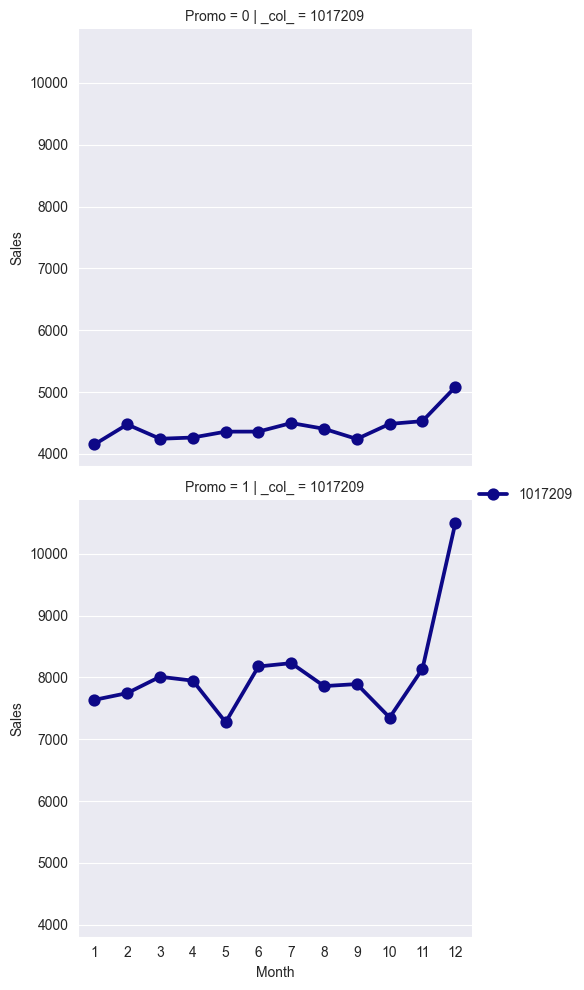

In [32]:
###Analysis

train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.isocalendar().week
train['SalePerCustomer'] = train['Sales']/train['Customers']
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
store[pd.isnull(store.CompetitionDistance)]
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

# Filter stores with missing 'Promo2SinceWeek' values (no promo info)
promo = store[store['Promo2SinceWeek'].isnull()]

# Filter stores with non-zero 'Promo2' values (stores with active promos)
promo_active = promo[promo['Promo2'] != 0]

# Get the shape (number of rows and columns) of the filtered dataframe
promo_active_shape = promo_active.shape
store.fillna(0, inplace = True)
train_store = pd.merge(train, store, how = 'inner', on = 'Store')
train_store.groupby('StoreType')['Sales'].describe()
train_store.groupby('StoreType')[['Customers', 'Sales']].sum()
#print(train_store)
import seaborn as sns
c = '#386B7F'
sns.catplot(data = train, x = 'Month', y = "Sales", 
               col = train_store['StoreType'].shape[0], # per store type in cols
               palette = 'plasma',
               hue = train_store['StoreType'].shape[0],
               row = 'Promo', # per promo in the store in rows
               color = c,
               kind='point') 

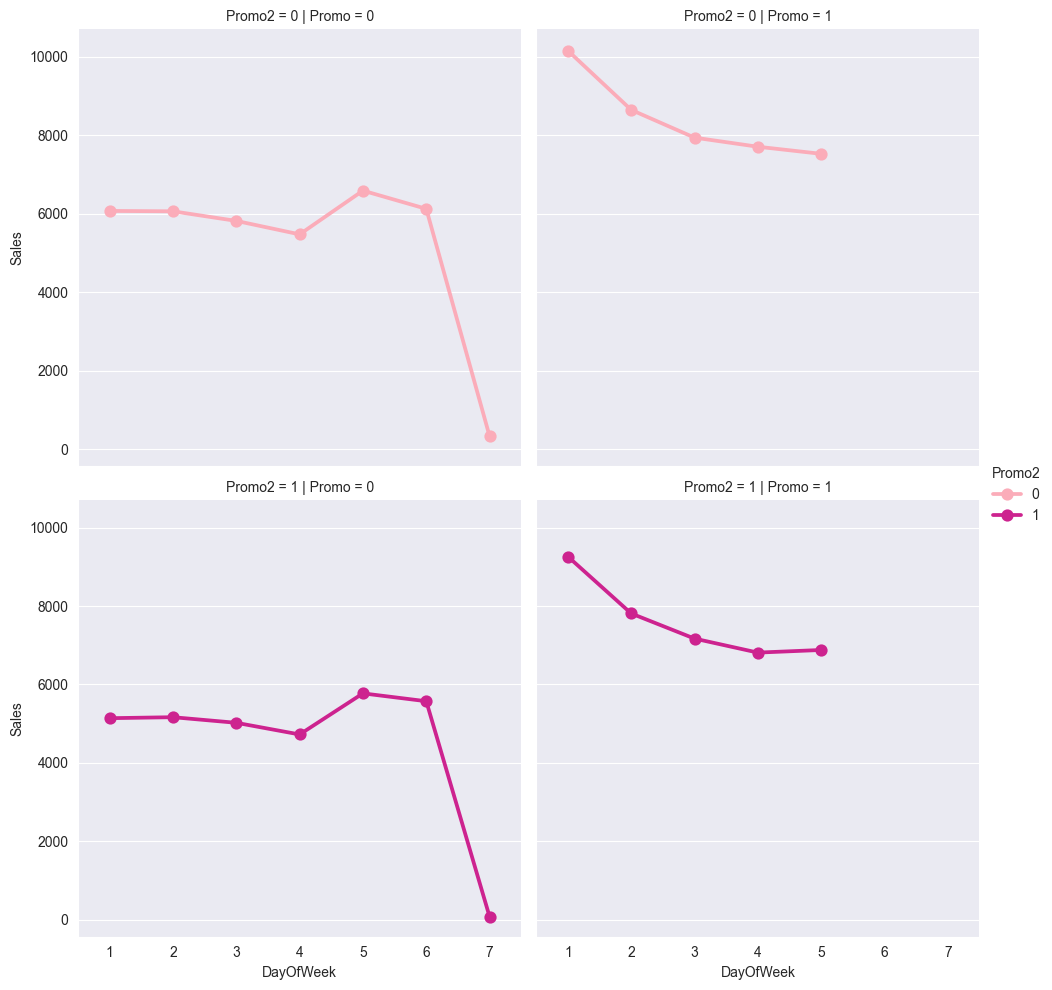

In [33]:
sns.catplot(data = train_store, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu',
               kind='point') 

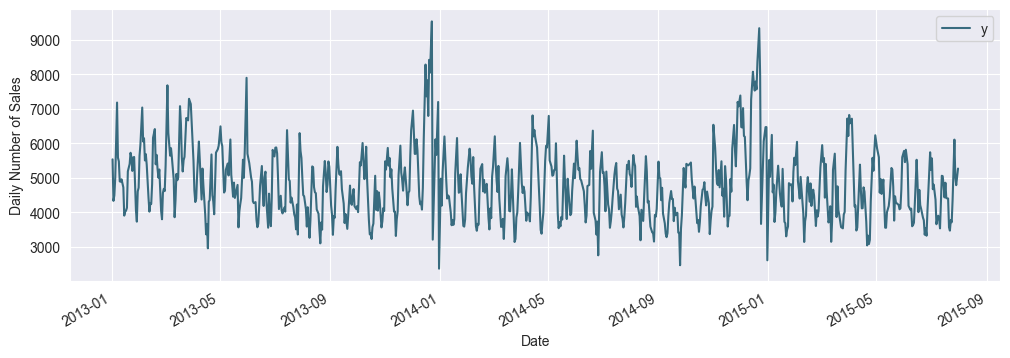

15:32:42 - cmdstanpy - INFO - Chain [1] start processing
15:32:43 - cmdstanpy - INFO - Chain [1] done processing


First week to forecast.


,ds,yhat
0,2013-01-02,5519.800763
1,2013-01-03,5309.677298
2,2013-01-04,5447.630243
3,2013-01-05,5744.196621
4,2013-01-07,5665.331814


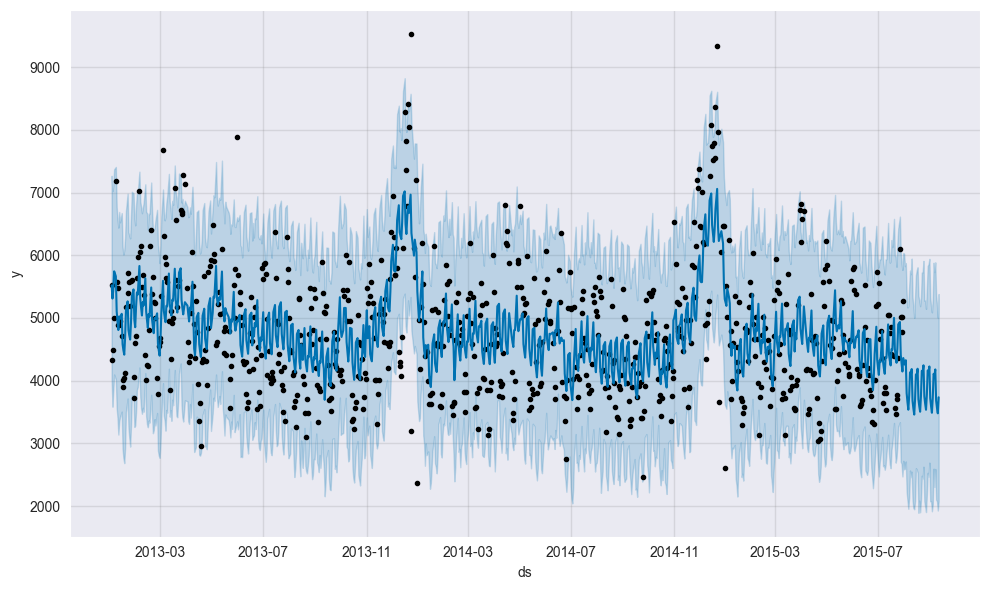

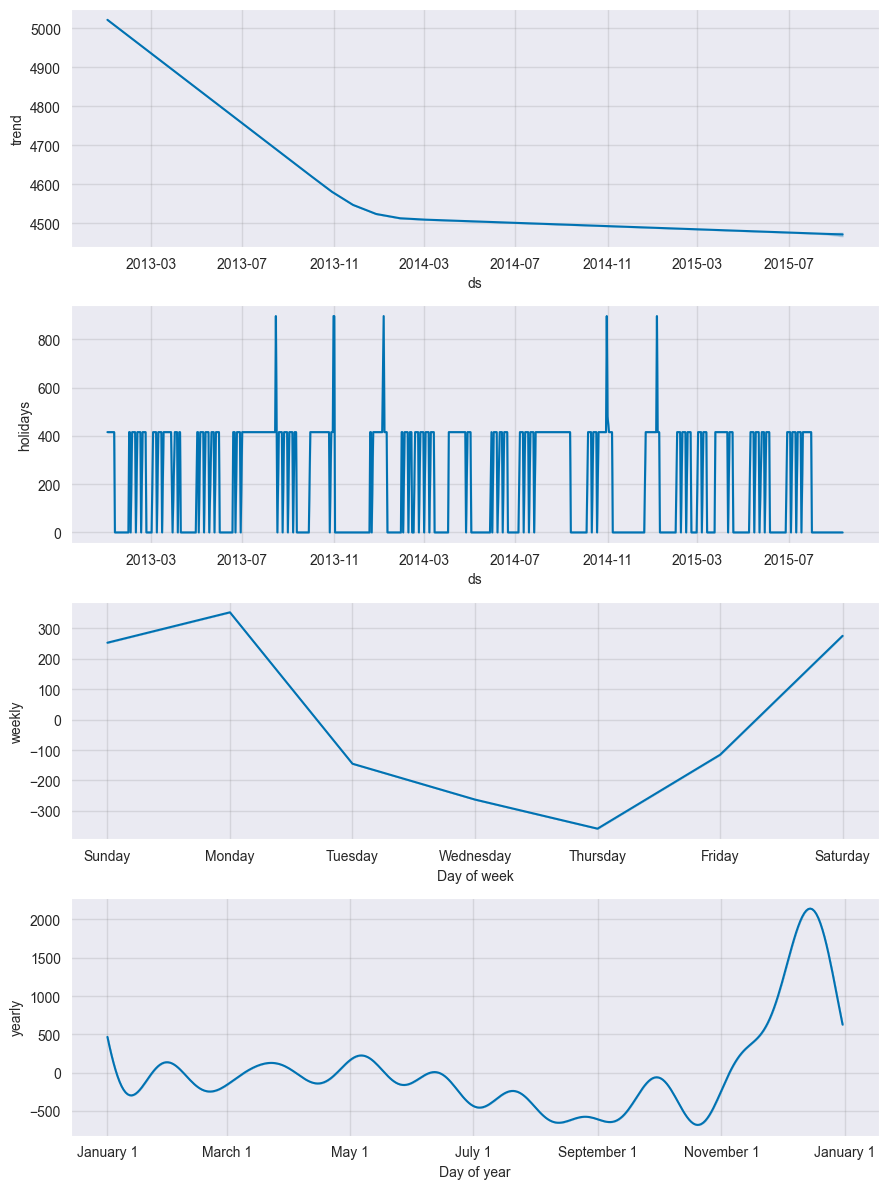

In [39]:
#Predicting next 6 week of sales with Prophet model:
from prophet import Prophet
df = pd.read_csv('rossman_store/train.csv', low_memory=False)

# remove closed stores and those with no sales
df = df[(df["Open"] != 0) & (df['Sales'] != 0)]

# sales for the store number 1 (StoreType C)
sales = df[df.Store == 1].loc[:, ['Date', 'Sales']]

# reverse to the order: from 2013 to 2015
sales = sales.sort_index(ascending = False)

# to datetime64
sales['Date'] = pd.DatetimeIndex(sales['Date'])

print(sales.dtypes)

# from the prophet documentation every variables should have specific names
sales = sales.rename(columns = {'Date': 'ds','Sales': 'y'})
sales.head()

# plot daily sales
ax = sales.set_index('ds').plot(figsize = (12, 4), color = c)
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

# create holidays dataframe
state_dates = df[(df.StateHoliday == 'a') | (df.StateHoliday == 'b') & (df.StateHoliday == 'c')].loc[:, 'Date'].values
school_dates = df[df.SchoolHoliday == 1].loc[:, 'Date'].values

state = pd.DataFrame({'holiday': 'state_holiday', 'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday', 'ds': pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))      
holidays.head()

# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width = 0.95, 
                   holidays = holidays)
my_model.fit(sales)

# dataframe that extends into future 6 weeks 
future_dates = my_model.make_future_dataframe(periods = 6*7)

print("First week to forecast.")
future_dates.tail(7)

# predictions
forecast = my_model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})
# visualizing predicions
my_model.plot(forecast);

my_model.plot_components(forecast)
fc.head()

In [37]:
#pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/a1/bd/36a4e4dd5d6cb48f75b6673b499ac80764693bd0c8515030a29aafc63161/holidays-0.64-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed08e046a4a9b10177fa3/stanio-0.5.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 15.2 MB/s eta 0:00:01
   ----- --------


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
